# F1 Analysis - Introduction to Data Sciences project

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from datetime import datetime
from math import floor
from matplotlib.ticker import MultipleLocator
from cycler import cycler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier

# Setting a universal font for all plots
plt.rcParams['font.family'] = 'arial'
# Setting a universal plot style for all plots
plt.style.use('seaborn-whitegrid')

### Reading in the data

The data consists of most of the freely available Formula 1 data from 1950 to 2018. <br>
Link: http://ergast.com/mrd/

In [2]:
circuits = pd.read_csv('./f1db_csv/circuits.csv', header=None)
constructor_results = pd.read_csv('./f1db_csv/constructor_results.csv', header=None)
constructor_standings = pd.read_csv('./f1db_csv/constructor_standings.csv', header=None)
constructors = pd.read_csv('./f1db_csv/constructors.csv', header=None)
drivers = pd.read_csv('./f1db_csv/driver.csv', header=None)
driver_standings = pd.read_csv('./f1db_csv/driver_standings.csv', header=None)
lap_times = pd.read_csv('./f1db_csv/lap_times.csv', header=None)
pit_stops = pd.read_csv('./f1db_csv/pit_stops.csv', header=None)
qualifying = pd.read_csv('./f1db_csv/qualifying.csv', header=None)
races = pd.read_csv('./f1db_csv/races.csv', header=None)
results = pd.read_csv('./f1db_csv/results.csv', header=None)
seasons = pd.read_csv('./f1db_csv/seasons.csv', header=None)
status = pd.read_csv('./f1db_csv/status.csv', header=None)

### Adding correct column names to the datasets

Column names are based on the column names from here: https://www.kaggle.com/cjgdev/formula-1-race-data-19502017. <br>
Column names in our project are in snake case (snake_case).

In [3]:
circuits_column_names = ['circuit_id', 'circuit_ref', 'name', 'location', 'country', 'lat', 'lng', 'alt', 'url']
constructor_results_column_names = ['constructor_results_id', 'race_id', 'constructor_id', 'points', 'status']
constructor_standings_column_names = ['constructor_standings_id', 'race_id', 'constructor_id', 'points', 'position', 'position_text', 'wins']
constructors_column_names = ['constructor_id', 'constructor_ref', 'name', 'nationality', 'url']
drivers_column_names = ['driver_id', 'driver_ref', 'number', 'code', 'forename', 'surname', 'birth_date', 'nationality', 'url']
driver_standings_column_names = ['driver_standings_id', 'race_id', 'driver_id', 'points', 'position', 'position_text', 'wins']
lap_times_column_names = ['race_id', 'driver_id', 'lap', 'position', 'time', 'milliseconds']
pit_stops_column_names = ['race_id', 'driver_id', 'stop', 'lap', 'time', 'duration', 'milliseconds']
qualifying_column_names = ['qualify_id', 'race_id', 'driver_id', 'constructor_id', 'number', 'position', 'q1', 'q2', 'q3']
races_column_names = ['race_id', 'year', 'round', 'circuit_id', 'name', 'date', 'time', 'url']
results_column_names = ['result_id', 'race_id', 'driver_id', 'constructor_id', 'number', 'grid', 'position', 'position_text', 'position_order', 'points', 'laps', 'time', 'milliseconds', 'fastest_lap', 'rank', 'fastest_lap_time', 'fastest_lap_speed', 'status_id']
seasons_column_names = ['year', 'url']
status_column_names = ['status_id', 'status']

In [4]:
circuits.columns = circuits_column_names
constructor_results.columns = constructor_results_column_names
constructor_standings.columns = constructor_standings_column_names
constructors.columns = constructors_column_names
drivers.columns = drivers_column_names
driver_standings.columns = driver_standings_column_names
lap_times.columns = lap_times_column_names
pit_stops.columns = pit_stops_column_names
qualifying.columns = qualifying_column_names
races.columns = races_column_names
results.columns = results_column_names
seasons.columns = seasons_column_names
status.columns = status_column_names

### Replacing different types of non-existent (and non-sensical) values with a universal one

We are using np.nan as the universal non-existent value.

In [5]:
datasets = [circuits, constructor_results, constructor_standings, constructors, 
            drivers, driver_standings, lap_times, pit_stops, qualifying, races, 
            results, seasons, status]

for data in datasets:
    for column in data.columns:
        data[column] = data[column].replace('\\N', np.nan)  # Replacing previously used non-existent value with ours
        data[column] = data[column].replace('', np.nan)  # Replacing missing values

### Writing the adjusted DataFrames to .csv files for ease of manual checking and look up

In [6]:
dataset_names = ["circuits", "constructor_results", "constructor_standings", 
                 "constructors", "drivers", "driver_standings", "lap_times", 
                 "pit_stops", "qualifying", "races", "results", "seasons", 
                 "status"]

# DataFrames are in the folder 'f1_datasets_adjusted' as .csv files (with UTF-8 encoding)

# Commented out because there is no reason to keep writing them every time the notebook is ran
#for i in range(len(datasets)):
#    file_name = "f1_datasets_adjusted/" + dataset_names[i] + ".csv"
#    datasets[i].to_csv(file_name, sep=',', encoding='utf-8', index=False)

### Finding the minimum and maximum values of each feature of each dataset

In [7]:
for i in range(len(datasets)):
    print("Name of dataset: " + str(dataset_names[i]))
    print("Minimum values of each feature in the dataset:")
    min_values = datasets[i].min()
    print(min_values)
    print("Maximum values of each feature in the dataset:")
    max_values = datasets[i].max()
    print(max_values)
    print()
    print()

Name of dataset: circuits
Minimum values of each feature in the dataset:
circuit_id                                        1
circuit_ref                                     BAK
name                                        A1-Ring
location                                  Abu Dhabi
country                                   Argentina
lat                                        -37.8497
lng                                        -118.189
url            http://en.wikipedia.org/wiki/A1-Ring
dtype: object
Maximum values of each feature in the dataset:
circuit_id                                      74
circuit_ref                                 zolder
name                                        Zolder
location                                 Zandvoort
country                                    Vietnam
lat                                        57.2653
lng                                        144.968
url            http://en.wikipedia.org/wiki/Zolder
dtype: object


Name of dataset: construct

## Comparing the fastest lap times at frequent circuits during the 2004-2018 period

Being frequent is defined by being raced at 11 times or more during the 2004-2018 period. Because there is a big variety in Formula 1 tracks and many of them are quite new or are rather not raced at anymore, such a restriction had to be made. <br>
We are using the absolute fastest lap times at every track year by year (fastest lap during the race). <br>
We are creating a 4x4 grid of the graphs (last 2 are emtpy).

In [8]:
years = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

# List for all races during the 2004-2018 period
suitable_races = []

for index, row in races.iterrows():
    year = int(row['year'])
    if (year in years):  # If the year of the race is between 2004 and 2018
        suitable_races.append([row['race_id'], row['circuit_id'], year])

# List for the circuit, year, and lowest lap time during the race in all suitable races
circuit_year_lap = []

for race in suitable_races:
    race_id = race[0]
    race_lap_times = results.loc[results['race_id'] == race_id]['fastest_lap_time']
    lowest_race_lap_time = 10000
    for lap_time in race_lap_times:
        if (not lap_time is np.nan):
            minutes_seconds = lap_time.split(":")
            lap_time = float(int(minutes_seconds[0]) * 60 + float(minutes_seconds[1]))
            if (lap_time < lowest_race_lap_time):
                lowest_race_lap_time = lap_time
    circuit_year_lap.append([race[1], race[2], lowest_race_lap_time])

# Replacing circuit ID-s with their full names
for i in circuit_year_lap:
    circuit_id = i[0]
    circuit_name = circuits.loc[circuits['circuit_id'] == circuit_id]['name']
    i[0] = circuit_name.tolist()[0]
    
df_circuit_year_lap = pd.DataFrame(circuit_year_lap)
df_circuit_year_lap.columns = ['circuit', 'year', 'fastest lap time (s)']

df_circuit_year_lap = df_circuit_year_lap.sort_values(['circuit', 'year'], ascending=True)
# Filtering the DataFrame so that the non-frequent circuits are removed
df_circuit_year_lap = df_circuit_year_lap.groupby('circuit').filter(lambda x : len(x)>10)
# Creating a list from the DataFrame for plotting purposes
circuits_list = df_circuit_year_lap.circuit.unique()

Plotting the fastest lap times of 2004-2018 at frequent tracks.

<module 'matplotlib.pyplot' from 'C:\\Users\\Siim\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


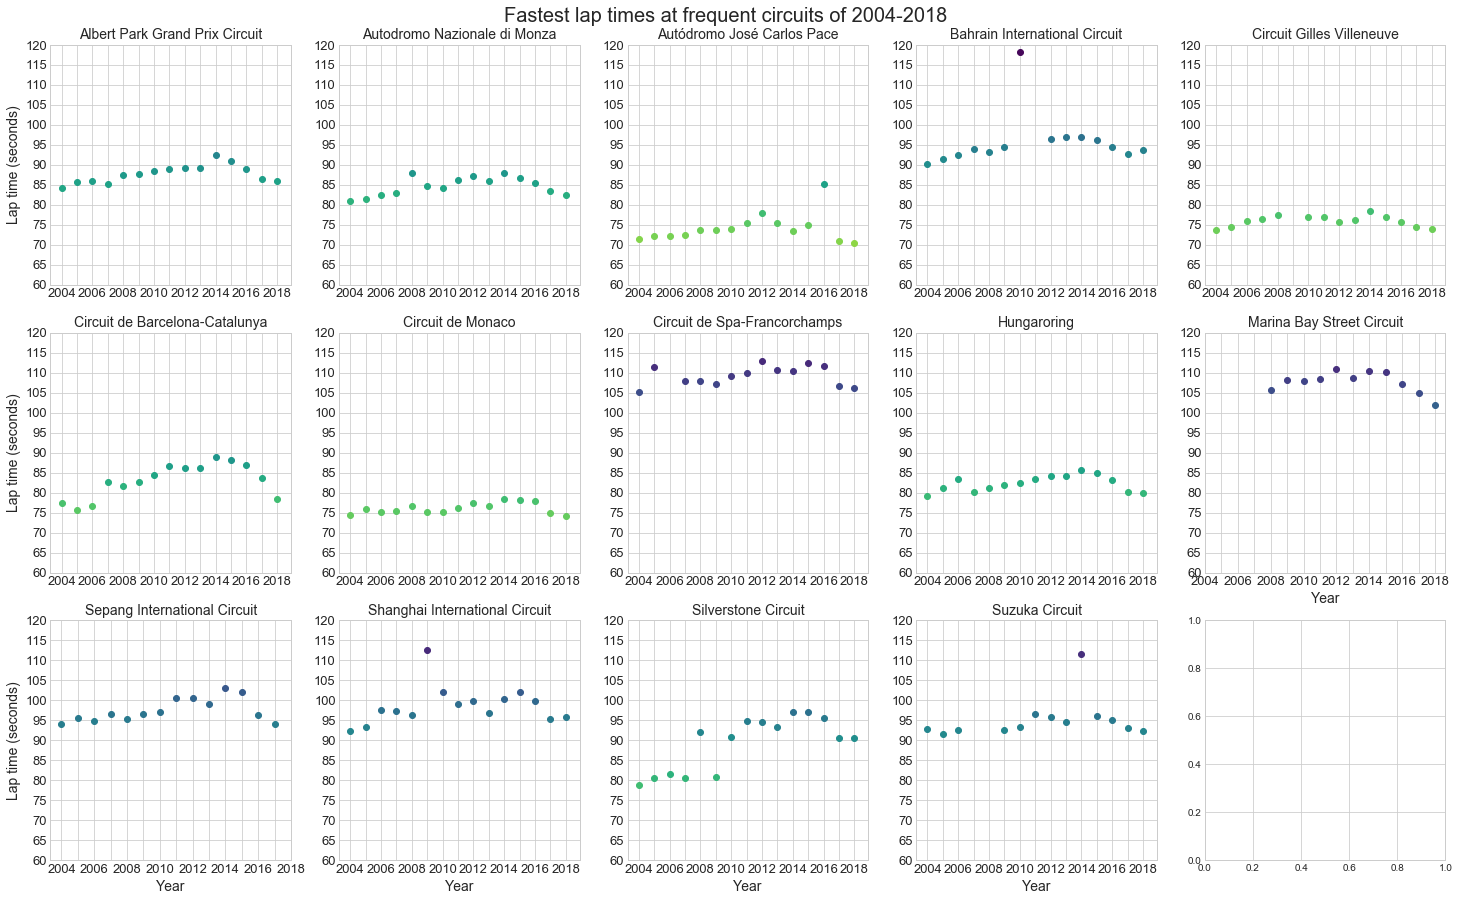

In [9]:
fig, axes = plt.subplots(3, 5, figsize=(25, 15))
plt.style.use('seaborn-whitegrid')

row = 1
column = 1

import matplotlib.cm as cm
colors = cm.viridis_r(np.linspace(0,1,60))  # Creating a colormap for the the y-axis range (60-120)

for circuit in circuits_list:
    if(column == 6):
        row += 1
        column = 1
    
    # Finding the color of a single data point on a subplot by its lap time value (seconds)
    # Higher values are purple, values around the middle are blue and lower values are green
    x = df_circuit_year_lap[df_circuit_year_lap.circuit == circuit].year.tolist()
    y = df_circuit_year_lap[df_circuit_year_lap.circuit == circuit]['fastest lap time (s)'].tolist()
    for i in range(len(x)):
        color_index = int(y[i]) - 60 
        axes[row-1, column-1].scatter(x[i], y[i], color = colors[color_index])
        axes[row-1, column-1].tick_params(axis = 'both', which = 'major', labelsize = 13)
        axes[row-1, column-1].tick_params(axis = 'both', which = 'minor', labelsize = 13)
           
    axes[row-1, column-1].set_title(circuit, fontsize=14)
    # Only displaying x-axis lables for the subplots at the bottom
    if (circuit in ['Silverstone Circuit', 'Suzuka Circuit', 'Sepang International Circuit', 'Shanghai International Circuit', 'Marina Bay Street Circuit']):
        axes[row-1, column-1].set_xlabel('Year', fontsize=14)
    # Only displaying y-axis labels for the subplots on the left
    if (circuit in ['Albert Park Grand Prix Circuit', 'Circuit de Barcelona-Catalunya', 'Sepang International Circuit']):
        axes[row-1, column-1].set_ylabel('Lap time (seconds)', fontsize=14)
    axes[row-1, column-1].grid(True)
    every_nth = 2
    axes[row-1, column-1].xaxis.set_ticks(np.arange(2004, 2019, 1))
    for n, label in enumerate(axes[row-1, column-1].xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
    axes[row-1, column-1].yaxis.set_ticks(np.arange(60, 125, 5))
    
    column += 1

mt = plt.suptitle('Fastest lap times at frequent circuits of 2004-2018', size=20)  # Title of all subplots
mt.set_y(0.915)
plt.style.use('seaborn-whitegrid')
print(plt)

#plt.savefig('Graphs/lap_times_2004-2018.svg')  # Saving the graph to the file 'lap_times_2004-2018.svg' 

## Predicting the race winners of the 2018 season based on pre-race and race data (except for finishing positions) from 2014-2017

2018 is the last season of which we have data. <br>
2014-2018 are the years following regulation (rules) changes after 2013 so the data should be somewhat similiar.

Because the data is from the past, we know that only racers from the top 3 teams (Mercedes, Ferrari, Red Bull) have won races during this period, thus we will focus only on the 6 drivers in these teams (each team has 2 drivers in every race).

It's worth noting that all 6 drivers were in those teams for only the 2017 season. Earlier on some of them were in different teams. This means we have to use data from their earlier races for other teams as well.

The top 6 drivers during 2018: <br>
Red Bull
* Max Verstappen
* Daniel Ricciardo

Ferrari
* Sebastian Vettel
* Kimi Räikkönen

Mercedes
* Lewis Hamilton
* Valtteri Bottas

Info to use
* Circuit (id)
* Season
* Constructor (id)
* Pit stops
* Pit stop duration
* Qualifying position (from qualifying dataset)
* Q3 time (if it doesn't exist use the slowest of the rest of the top 6, because they probably had a mechanical issue and thus the time would ruin predictions)
* Grid position (from results dataset) (doesn't have to match qualifying position, i.e. they got penalties for swapping parts after the qualifying)
* On which lap they got the fastest lap (from results dataset)
* Time of the fastest lap (from results dataset)
* Round (which race of the year was it, i.e. the 5th race out of 22) (from races dataset)

We will create a training dataset from years 2014-2016. <br>
The validation dataset will be of the year 2017. <br>
The test dataset will be of the year 2018.

Finding all races which took place between 2014 and 2018.

In [10]:
years = [2014, 2015, 2016, 2017, 2018]
# Max Verstappen, Daniel Ricciardo, Sebastian Vettel, Kimi Räikkönen, Lewis Hamilton, Valtteri Bottas
driver_ids = [830, 817, 20, 8, 1, 822]

# List for all races during the 2014-2018 period
suitable_races = []

for index, row in races.iterrows():
    year = int(row['year'])
    if (year in years):  # If the year of the race is between 2014 and 2018
        suitable_races.append([row['race_id'], year, row['circuit_id'], row['round']])
        
#print(suitable_races)

Finding values for: result_id, race_id, driver_id, constructor_id, grid_position, lap_nr_of_fastest_lap, fastest_lap_time.

In [11]:
# List for every single result for every single race (maximum 6 results per race as there were 6 drivers)
suitable_results = []

for race in suitable_races:
    race_id = race[0]
    suitable_race_all_results = results.loc[results['race_id'] == race_id]
    for driver_id in driver_ids:
        suitable_race_driver_results = suitable_race_all_results.loc[suitable_race_all_results['driver_id'] == driver_id]
        # The driver did indeed take part in this race
        if (suitable_race_driver_results.empty == False):
            # Converting Series to a list and then taking the first (and only) element from the list (the 'result_id')
            result_id = suitable_race_driver_results['result_id'].tolist()[0]
            constructor_id = suitable_race_driver_results['constructor_id'].tolist()[0]
            grid_position = suitable_race_driver_results['grid'].tolist()[0]
            lap_nr_of_fastest_lap = suitable_race_driver_results['fastest_lap'].tolist()[0]
            fastest_lap_time = suitable_race_driver_results['fastest_lap_time'].tolist()[0]
            result_data_to_append = [result_id, race_id, driver_id, constructor_id, grid_position, 
                              lap_nr_of_fastest_lap, fastest_lap_time]
            # Appending a list of all data available from the result of a single driver
            suitable_results.append(result_data_to_append)          

# At this point we have the result_id, race_id, driver_id, constructor_id, grid_position, 
# lap_nr_of_fastest_lap, fastest_lap_time

#print(suitable_results)

Finding values for: year, circuit, round, qualifying position, Q3 time, amount of pit stops, pit stop duration.

In [12]:
df_results = pd.DataFrame(suitable_results)
df_results.columns = ['result_id', 'race_id', 'driver_id', 'constructor_id', 'grid_position', 
                      'lap_of_fastest_lap', 'fastest_lap_time']

# Adding the missing columns (with np.nan)
# Using np.nan some int values turn into floats
# This is one fix for some values (but not all):
# (with -1 as the value so if we later add int-s they won't be made into floats)
# This can also be fixed later and for the machine learning this should not matter at all
unadded_columns = ['circuit', 'year', 'pit_stops', 'pit_stop_duration', 'qualifying_position', 'Q3_time', 'round']
for column in unadded_columns:
    df_results[column] = np.nan

#print(df_results)

# Adding values for columns: year, circuit, round, qualifying position, Q3 time, amount of pit stops, pit stop duration
for index, row in df_results.iterrows():
    race_id = int(row['race_id'])
    
    # Adding values for columns: 'circuit', 'year', 'round'
    for race in suitable_races:
        if (race[0] == race_id):
            year = int(race[1])
            circuit_id = int(race[2])
            # Using this variable name (round_of_year) so as not to overwrite the round() function
            round_of_year = int(race[3])
            df_results.loc[index, ['circuit']] = circuit_id
            df_results.loc[index, ['year']] = year
            df_results.loc[index, ['round']] = round_of_year
    
    driver_id = int(row['driver_id'])
    
    # Adding values for columns: 'qualifying_position', 'Q3_time'
    qualifying_data = qualifying.loc[(qualifying['race_id'] == race_id) & (qualifying['driver_id'] == driver_id)]
    # Converting Series to a list (which only contains one element or none)
    qualifying_position = qualifying_data['position'].tolist()
    if not qualifying_position:  # The qualifying position field is empty
        df_results.loc[index, ['qualifying_position']] = np.nan
    else:
        df_results.loc[index, ['qualifying_position']] = qualifying_position[0]
    q3_time = qualifying_data['q3'].tolist()
    if not q3_time:  # The Q3 time field is empty
        df_results.loc[index, ['Q3_time']] = np.nan
    else:
        df_results.loc[index, ['Q3_time']] = qualifying_data['q3'].tolist()[0]
        
    # Adding values for columns: 'pit_stops', 'pit_stop_duration'
    pit_stops_data = pit_stops.loc[(pit_stops['race_id'] == race_id) & (pit_stops['driver_id'] == driver_id)]
    # Checking if the driver did any pit stops at all
    # Converting Series oto a list (which only contains one element or none)
    first_pit_stop = pit_stops_data['stop'].tolist()
    if not first_pit_stop:  # The first_pit_stop field is empty, therefore the driver did no pit stops
        df_results.loc[index, ['pit_stops']] = np.nan
        df_results.loc[index, ['pit_stop_duration']] = np.nan
    else:
        # Atleast one pit stop was made, giving initial values for the columns
        df_results.loc[index, ['pit_stops']] = 0
        df_results.loc[index, ['pit_stop_duration']] = 0
        
        # Looping through all pit stops
        for i in pit_stops_data.index:
            pit_stop_duration = pit_stops_data.at[i, 'milliseconds']
            # We will save the amount of pit stops made
            df_results.at[index, 'pit_stops'] += 1
            
            existing_pit_stop_duration = df_results.at[index, 'pit_stop_duration']
            
            # If the pit_stop_duration is np.nan from a previous loop iteration, don't bother changing it
            if (existing_pit_stop_duration is np.nan):
                continue
            
            # current iterations pit_stop_duration value is non-existent
            if not pit_stop_duration:
                # Because the current iterations duration was non-existent, we will
                # replace the total duration as non-existent as well
                df_results.at[index, 'pit_stop_duration'] = np.nan
            # If everything is correct, update the total pit stop duration
            else:
                df_results.at[index, 'pit_stop_duration'] += float(pit_stop_duration) 

#print(df_results)   

Turning Q3_time and fastest_lap_time into seconds, pit_stop_duration from milliseconds to seconds.

In [13]:
for index, row in df_results.iterrows():
    # Replacing Q3_time from string to seconds
    Q3_time = row['Q3_time']
    if (not Q3_time is np.nan):
        minutes_seconds = Q3_time.split(":")
        Q3_time = float(int(minutes_seconds[0]) * 60 + float(minutes_seconds[1]))
        df_results.loc[index, ['Q3_time']] = Q3_time
    
    # Replacing fastest_lap_time from string to seconds
    fastest_lap_time = row['fastest_lap_time']
    if (not fastest_lap_time is np.nan):
        minutes_seconds = fastest_lap_time.split(":")
        fastest_lap_time = float(int(minutes_seconds[0]) * 60 + float(minutes_seconds[1]))
        df_results.loc[index, ['fastest_lap_time']] = fastest_lap_time
        
    # Converting pit stop duration from milliseconds to seconds
    pit_stop_duration = row['pit_stop_duration']
    if (not pit_stop_duration is np.nan):
        df_results.loc[index, ['pit_stop_duration']] = pit_stop_duration / 1000.0

#print(df_results)

Converting unnecessary floats to integers to help one-hot encode later.

In [14]:
float_to_int_columns = ['circuit', 'year', 'round']
df_results[float_to_int_columns] = df_results[float_to_int_columns].applymap(np.int64)
# Can't convert qualifying_position and pit_stops from float to int, because they also include np.nan and int columns don't
# support np.nan

#print(df_results)

Replacing np.nan (missing values) with suitable values.

In [15]:
# Checking which columns contain the value np.nan
nan_containing_columns = df_results.columns[df_results.isna().any()].tolist()
print("Columns which contain the value 'np.nan':")
print(nan_containing_columns)
print()

# Replace np.nan values with sensible values
# For example, a missing Q3 time should perhaps be replaced with the average of the top 6.
# Because when a top 6 driver doesn't get into Q3, they probably had an issue with the car, so it ruins the prediction
# due to factors that were not under the drivers control (too random).

# Replacing lap_of_fastest_lap and fastest_lap_time, qualifying_position, Q3_time, pit_stops
for index, row in df_results.iterrows():
    race_id = row['race_id']
    
    lap_of_fastest_lap = row['lap_of_fastest_lap']
    if (lap_of_fastest_lap is np.nan):
        # Find the average of all other top 6 drivers during this race
        lap_of_fastest_lap_data = df_results.loc[(df_results['race_id'] == race_id)]
        sum_of_laps = 0
        total_other_drivers = 0
        for i in lap_of_fastest_lap_data.index:
            current_lap_of_fastest_lap = lap_of_fastest_lap_data.at[i, 'lap_of_fastest_lap']
            if (not current_lap_of_fastest_lap is np.nan):
                sum_of_laps += int(current_lap_of_fastest_lap)
                total_other_drivers += 1
        average_lap_of_fastest_lap = round(sum_of_laps/total_other_drivers)
        # Replacing the missing value with the rounded average
        df_results.at[index, 'lap_of_fastest_lap'] = average_lap_of_fastest_lap

    fastest_lap_time = row['fastest_lap_time']
    if np.isnan(fastest_lap_time):
        # Find the average of all other top 6 drivers during this race
        fastest_lap_time_data = df_results.loc[(df_results['race_id'] == race_id)]
        sum_of_lap_times = 0
        total_other_drivers = 0
        for i in fastest_lap_time_data.index:
            current_fastest_lap_time = fastest_lap_time_data.at[i, 'fastest_lap_time']
            if (not current_fastest_lap_time is np.nan):
                sum_of_lap_times += current_fastest_lap_time
                total_other_drivers += 1
        average_lap_time = sum_of_lap_times / total_other_drivers
        # Replacing the missing value with the average
        df_results.at[index, 'fastest_lap_time'] = average_lap_time
        
    qualifying_position = row['qualifying_position']
    if np.isnan(qualifying_position):
        qualifying_position_data = df_results.loc[(df_results['race_id'] == race_id)]
        sum_of_qualifying_positions = 0
        total_other_drivers = 0
        for i in qualifying_position_data.index:
            current_qualifying_position = qualifying_position_data.at[i, 'qualifying_position']
            if (not np.isnan(current_qualifying_position)):
                sum_of_qualifying_positions += current_qualifying_position
                total_other_drivers += 1
        average_qualifying_position = round(sum_of_qualifying_positions/total_other_drivers)
        # Replacing the missing value with the rounded average of the other 5 drivers (if they had a position)
        # (qualifying position has to be an integer)
        df_results.at[index, 'qualifying_position'] = average_qualifying_position
        
    Q3_time = row['Q3_time']
    if np.isnan(Q3_time):
        Q3_time_data = df_results.loc[(df_results['race_id'] == race_id)]
        sum_of_Q3_times = 0
        total_other_drivers = 0
        for i in Q3_time_data.index:
            current_Q3_time = Q3_time_data.at[i, 'Q3_time']
            if (not np.isnan(current_Q3_time)):
                sum_of_Q3_times += current_Q3_time
                total_other_drivers += 1
        # Only make replacements if atleast one other driver had a Q3_time
        if  (total_other_drivers > 0):
            average_Q3_time = sum_of_Q3_times / total_other_drivers
            # Replacing the missing value with the average of the other 5 drivers (if they had a Q3 time)
            df_results.at[index, 'Q3_time'] = average_Q3_time
            
    pit_stops_amount = row['pit_stops']
    if np.isnan(pit_stops_amount):
        pit_stops_data = df_results.loc[(df_results['race_id'] == race_id)]
        pit_stops_list = []
        pit_stops_duration_list = []
        for i in pit_stops_data.index:
            current_pit_stops = pit_stops_data.at[i, 'pit_stops']
            current_pit_stops_duration = pit_stops_data.at[i, 'pit_stop_duration']
            if (not np.isnan(current_pit_stops)):
                if (not np.isnan(current_pit_stops_duration)):
                    pit_stops_list.append(current_pit_stops)
                    pit_stops_duration_list.append(current_pit_stops_duration)
        average_pit_stops = round(sum(pit_stops_list) / len(pit_stops_list))
        sum_of_pit_stops_duration = 0
        matching_pit_stops_drivers = 0
        for j in range(len(pit_stops_list)):
            if (pit_stops_list[j] == average_pit_stops):
                matching_pit_stops_drivers += 1
                sum_of_pit_stops_duration += pit_stops_duration_list[j]
        average_pit_stops_duration = sum_of_pit_stops_duration / matching_pit_stops_drivers
        # Replacing the amount of pit stops with the average of the other 5 drivers (if they did any pit stops)
        df_results.at[index, 'pit_stops'] = average_pit_stops
        # Replacing the total pit stop duration with the average of the other 5 drivers (if they did any pit stops)
        df_results.at[index, 'pit_stop_duration'] = round(average_pit_stops_duration, 3)
                
        
#print(df_results)

# Checking again which columns contain the value np.nan
nan_containing_columns = df_results.columns[df_results.isna().any()].tolist()
print("Columns which contain the value 'np.nan':")
print(nan_containing_columns)
print()

# The column 'Q3_time' cannot be rid of np.nan values because at one race the qualifying session was not held due to weather, 
# therefore not a single driver had a 'Q3_time' value there.

Columns which contain the value 'np.nan':
['lap_of_fastest_lap', 'fastest_lap_time', 'pit_stops', 'pit_stop_duration', 'qualifying_position', 'Q3_time']

Columns which contain the value 'np.nan':
['Q3_time']



Replacing np.nan values in the 'Q3_time' column at the single race with the mean value of all 6 drivers from the previous year at the same race.

In [16]:
# Finding the missing 'Q3_time' values
df_missing_Q3 = df_results.loc[df_results['Q3_time'].isnull()]
year_of_missing_Q3 = df_missing_Q3['year'].iloc[0]
circuit_of_missing_Q3 = df_missing_Q3['circuit'].iloc[0]
df_year_before = df_results.loc[(df_results['year'] == (year_of_missing_Q3 - 1)) & 
                                       (df_results['circuit'] == circuit_of_missing_Q3)]
# The average Q3 time of the 6 drivers in the previous year
mean_Q3_time_year_before = df_year_before['Q3_time'].mean()

# Replacing all np.nan values in the column 'Q3_time' with the average
df_results.loc[df_results['Q3_time'].isnull(), 'Q3_time'] = mean_Q3_time_year_before

nan_containing_columns = df_results.columns[df_results.isna().any()].tolist()
print("Columns which contain the value 'np.nan':")
print(nan_containing_columns)
print()

# All np.nan values have been replaced

Columns which contain the value 'np.nan':
[]



Converting the rest of the unnecessary floats to integers to help one-hot encode.

In [17]:
new_float_to_int_columns = ['pit_stops', 'qualifying_position']
df_results[new_float_to_int_columns] = df_results[new_float_to_int_columns].applymap(np.int64)

#print(df_results)

Adding values to new column 'win' based on whether the driver won at that race

In [18]:
# Add values to new column 'win' for validation_results and test_results
for index, row in df_results.iterrows():
    race_id = row['race_id']
    driver_id = row['driver_id']
    race_results = results.loc[(results['race_id'] == race_id) & (results['driver_id'] == driver_id)]
    # Finding the position of every driver at every race
    position_of_driver = race_results['position'].tolist()[0]
    if (position_of_driver == "1"):
        df_results.at[index, 'win'] = 1
    else:
        df_results.at[index, 'win'] = 0
        
print(df_results)

     result_id  race_id  driver_id  constructor_id  grid_position  \
0        22151      900        817               9              2   
1        22147      900         20               9             12   
2        22136      900          8               6             11   
3        22148      900          1             131              1   
4        22134      900        822               3             15   
5        22167      901        817               9              5   
6        22154      901         20               9              2   
7        22163      901          8               6              6   
8        22152      901          1             131              1   
9        22159      901        822               3             18   
10       22177      902        817               9             13   
11       22179      902         20               9             10   
12       22183      902          8               6              5   
13       22174      902          1

One-hot encoding categorical values.

In [19]:
# One-hot encoding categorical fields (even though they are represented by integers, like 'constructor_id')

#print(df_results.columns)
# Column 'result_id' is dropped, because it is simply an id for the result and holds no other useful information.
# Column 'race_id' is dropped as well, because it is simply an id for the race and holds no other useful information.
del df_results['result_id']
del df_results['race_id']

# Categorical columns left: 'driver_id', 'constructor_id', 'circuit'
columns_to_encode = ['driver_id', 'constructor_id', 'circuit']
df_results_dum = pd.get_dummies(df_results, columns=columns_to_encode)

#pd.set_option('display.max_columns', None)  
#print(df_results_dum.columns.values)

Separating datasets into training, validation and test

In [20]:
# Training data set consists of all results from the years 2014-2016 (both included)
train_results = df_results_dum.loc[(df_results_dum['year'] >= 2014) & (df_results_dum['year'] <= 2016)]
# Validation data set consists of all results from the year 2017
validation_results = df_results_dum.loc[df_results_dum['year'] == 2017]
# Test data set consists of all results from the year 2016
test_results = df_results_dum.loc[df_results_dum['year'] == 2018]

X_train = train_results.drop('win', axis=1)
y_train = train_results['win']

X_validation = validation_results.drop('win', axis=1)
y_validation = validation_results['win']

X_test = test_results.drop('win', axis=1)
y_test = test_results['win']

Using RandomForestClassifier on the validation set.

In [21]:
rf = RandomForestClassifier(n_estimators=10000, bootstrap=True, random_state = 1).fit(X_train, y_train)
y_pred_rf = rf.predict(X_validation)
y_pred_rf_proba = rf.predict_proba(X_validation)[:,1]

rf_acc = accuracy_score(y_validation, y_pred_rf)
print("Accuracy of the RandomForestClassifier on the validation set: ", rf_acc)

# Every 6 elements represents a single race
print(y_pred_rf)

Accuracy of the RandomForestClassifier on the validation set:  0.8833333333333333
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]


Using SVM on the validation set.

In [22]:
svm = SVC(kernel='linear', tol = 1, random_state = 1, probability = True).fit(X_train, y_train)
y_pred_svm =  svm.predict(X_validation)
y_pred_svm_proba = svm.predict_proba(X_validation)[:,1]

svm_acc = accuracy_score(y_validation, y_pred_svm)
print("Accuracy of SVM on the validation set: ", svm_acc)

# Every 6 elements represents a single race
print(y_pred_svm)

Accuracy of SVM on the validation set:  0.85
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]


Using KNN on the validation set.

In [23]:
knn = KNeighborsClassifier(n_neighbors = 1, leaf_size=1).fit(X_train, y_train)
y_pred_knn = knn.predict(X_validation)

knn_acc = accuracy_score(y_validation, y_pred_knn)
print("Accuracy of KNN on the validation set: ", knn_acc)

# Every 6 elements represents a single race
print(y_pred_knn)

Accuracy of KNN on the validation set:  0.8166666666666667
[0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Using GaussianNB on the validation set.

In [24]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_validation)
y_pred_gnb_proba = gnb.predict_proba(X_validation)[:,1]

gnb_acc = accuracy_score(y_validation, y_pred_gnb)
print("Accuracy of GaussianNB on the validation set: ", gnb_acc)

# Every 6 elements represents a single race
print(y_pred_gnb)

Accuracy of GaussianNB on the validation set:  0.675
[0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]


Using AdaBoostClassifier on the validation set.

In [25]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
y_pred_ada = ada.predict(X_validation)
y_pred_ada_proba = ada.predict_proba(X_validation)[:,1]

ada_acc = accuracy_score(y_validation, y_pred_ada)
print("Accuracy of AdaBoostClassifier on the validation set: ", ada_acc)

# Every 6 elements represents a single race
print(y_pred_ada)

Accuracy of AdaBoostClassifier on the validation set:  0.825
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Printing out every row in X_validation along with RandomForestClassifier probabilities and predictions.

In [26]:
race_ids = [col for col in X_validation.columns if 'race_id' in col]
driver_ids = [col for col in X_validation.columns if 'driver_id' in col]
circuit_ids = [col for col in X_validation.columns if 'circuit' in col]

counter = 0
for index, row in X_validation.iterrows():
    this_race_id = 0
    this_driver_id = 0
    this_circuit_id = 0
    for race_id in race_ids:
        if row[race_id] == 1:
            this_race_id = race_id[8:]
            break
    for driver_id in driver_ids:
        if row[driver_id] == 1:
            this_driver_id = driver_id[10:]
            break
    for circuit_id in circuit_ids:
        if row[circuit_id] == 1:
            this_circuit_id = circuit_id[8:]
    
    # All X_validation rows with RFC probabilities and predictions
    #print("Race: " + str(this_race_id) + ";\tDriver: " + str(this_driver_id) + ";\tCircuit: " + 
    #      str(this_circuit_id) + ";\tProbability: " + str(y_pred_rf_proba[counter]) + 
    #     ";\tPrediction: " +str(y_pred_rf[counter]))
    counter += 1

Final test of classifiers on the test set.

In [27]:
# KNeighborsClassifier not included, because it doesn't output probabilities.

# RandomForestClassifier
y_pred_rf = rf.predict(X_test)
y_pred_rf_proba = rf.predict_proba(X_test)[:,1]
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Accuracy of the RandomForestClassifier on the test set: ", rf_acc)
print(y_pred_rf)
print()

# Support Vector Classifier
y_pred_svm =  svm.predict(X_test)
y_pred_svm_proba = svm.predict_proba(X_test)[:,1]
svm_acc = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM on the test set: ", svm_acc)
print(y_pred_svm)
print()

# GaussianNB
y_pred_gnb = gnb.predict(X_test)
y_pred_gnb_proba = gnb.predict_proba(X_test)[:,1]
gnb_acc = accuracy_score(y_test, y_pred_gnb)
print("Accuracy of GaussianNB on the test set: ", gnb_acc)
print(y_pred_gnb)
print()

# AdaBoostClassifier
y_pred_ada = ada.predict(X_test)
y_pred_ada_proba = ada.predict_proba(X_test)[:,1]
ada_acc = accuracy_score(y_test, y_pred_ada)
print("Accuracy of AdaBoostClassifier on the test set: ", ada_acc)
print(y_pred_ada)

Accuracy of the RandomForestClassifier on the test set:  0.8492063492063492
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0.]

Accuracy of SVM on the test set:  0.8412698412698413
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0.]

Accuracy of GaussianNB on the test set:  0.7142857142857143
[0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0.

### Proceeding with SVM, RandomForestClassifier, GaussianNB and AdaBoostClassifier

These output probabilities, unlike KNN.

Forcing every race to have exactly one winner among the 6 drivers. Because the classifiers don't know that there must be exactly one winner, they may predict 0 or more than 1 winners.

In [28]:
# Forcing exactly one driver to be predicted as the winner
# It makes sense that every race has a winner, therefore predicting no winners among
# the drivers is pointless.
# Forcing only the prediction of the driver with the highest probability of winning to be 1 (a win).

def force_one_winner(y_pred, y_pred_proba, classifier_name):
    print("CLASSIFIER USED: " + str(classifier_name))
    print()
    #regular_acc = accuracy_score(y_validation, y_pred)
    regular_acc = accuracy_score(y_test, y_pred)
    print("Accuracy of regular " + str(classifier_name) + " results on the validation set: ", regular_acc)
    new_y_pred = np.array([])
    print("ORIGINAL PREDICTIONS:")
    print("y_pred race by race:")
    for j in range(round(len(y_pred)/6)):
        sub_pred = y_pred[j*6:j*6+6]
        print("y_pred: " + str(sub_pred))
        # Checking if 0 drivers were predicted to win
        if (sub_pred.tolist().count(0.0) == 6):
            index_of_highest_probability = 0
            highest_probability = 0
            sub_pred_proba = y_pred_proba[j*6:j*6+6]
            for k in range(len(sub_pred_proba)):
                if (sub_pred_proba[k] > highest_probability):
                    highest_probability = sub_pred_proba[k]
                    index_of_highest_probability = k
            # Forcing the driver with the highest probability to win to be now 'predicted' to win
            sub_pred[index_of_highest_probability] = 1.0
        # Checking if more than 1 drivers were predicted to win
        if (sub_pred.tolist().count(1.0) > 1):
            index_of_highest_probability = 0
            highest_probability = 0
            sub_pred_proba = y_pred_proba[j*6:j*6+6]
            for k in range(len(sub_pred_proba)):
                if (sub_pred_proba[k] > highest_probability):
                    highest_probability = sub_pred_proba[k]
                    index_of_highest_probability = k
            # Firstly, forcing every driver to be 'predicted' to lose
            for l in range(len(sub_pred)):
                sub_pred[l] = 0.0
            # Secondly, forcing the driver with the highest probability to win to be now 'predicted' to win
            sub_pred[index_of_highest_probability] = 1.0
             
        new_y_pred = np.append(new_y_pred, np.array(sub_pred)) 
    print()
    print("MODIFIED PREDICTIONS:")
    print("new_y_pred race by race:")
    for j in range(round(len(new_y_pred)/6)):
        print("New_y_pred: " + str(new_y_pred[j*6:j*6+6]))
    print("Using " + str(classifier_name) + " predictions and modifying them as such that every race has exactly one predicted winner.")
    #new_acc = accuracy_score(y_validation, new_y_pred)
    new_acc = accuracy_score(y_test, new_y_pred)
    print("Accuracy of modified " + str(classifier_name) + " results on the validation set: ", new_acc)
    correct_winner_predictions = 0
    #y_validation_list = y_validation.tolist()
    y_test_list = y_test.tolist()
    new_y_pred_list = new_y_pred.tolist()
    #for i in range(len(y_validation_list)):
    #    if (y_validation_list[i] == 1):
    #        if (new_y_pred_list[i] == 1):
    #            correct_winner_predictions += 1
    for i in range(len(y_test_list)):
        if (y_test_list[i] == 1):
            if (new_y_pred_list[i] == 1):
                correct_winner_predictions += 1
    
    
    #ratio = correct_winner_predictions/(len(y_validation_list)/6)
    ratio = correct_winner_predictions/(len(y_test_list)/6)
    print("Ratio of correct race winner predictions / all races: " + str(ratio))
    print()
    new_acc_and_ratio = [regular_acc, new_acc, ratio]
    return new_acc_and_ratio
    
# Outputting the original accuracy, modified accuracy and ratio for every classifier we proceeded with
rf_accs_ratio = force_one_winner(y_pred_rf, y_pred_rf_proba, "RandomForestClassifier")
print()
svm_accs_ratio = force_one_winner(y_pred_svm, y_pred_svm_proba, "SVM")
print()
gnb_accs_ratio = force_one_winner(y_pred_gnb, y_pred_gnb_proba, "GaussianNB")
print()
ada_accs_ratio = force_one_winner(y_pred_ada, y_pred_ada_proba, "AdaBoostClassifier")

CLASSIFIER USED: RandomForestClassifier

Accuracy of regular RandomForestClassifier results on the validation set:  0.8492063492063492
ORIGINAL PREDICTIONS:
y_pred race by race:
y_pred: [0. 0. 0. 0. 1. 0.]
y_pred: [0. 0. 0. 0. 0. 0.]
y_pred: [0. 0. 0. 0. 0. 0.]
y_pred: [0. 0. 0. 0. 0. 0.]
y_pred: [0. 0. 0. 0. 1. 0.]
y_pred: [0. 0. 0. 0. 0. 0.]
y_pred: [0. 0. 0. 0. 1. 0.]
y_pred: [0. 0. 0. 0. 1. 0.]
y_pred: [0. 0. 0. 0. 0. 0.]
y_pred: [0. 0. 0. 0. 1. 0.]
y_pred: [0. 0. 0. 0. 0. 0.]
y_pred: [0. 0. 0. 0. 1. 0.]
y_pred: [0. 0. 0. 0. 1. 0.]
y_pred: [0. 0. 0. 0. 0. 0.]
y_pred: [0. 0. 0. 0. 1. 0.]
y_pred: [0. 0. 0. 0. 1. 1.]
y_pred: [0. 0. 0. 0. 1. 0.]
y_pred: [0. 0. 0. 0. 1. 0.]
y_pred: [0. 0. 0. 0. 0. 0.]
y_pred: [0. 0. 0. 0. 1. 0.]
y_pred: [0. 0. 0. 0. 1. 0.]

MODIFIED PREDICTIONS:
new_y_pred race by race:
New_y_pred: [0. 0. 0. 0. 1. 0.]
New_y_pred: [0. 0. 0. 0. 1. 0.]
New_y_pred: [0. 0. 0. 0. 1. 0.]
New_y_pred: [0. 0. 0. 0. 1. 0.]
New_y_pred: [0. 0. 0. 0. 1. 0.]
New_y_pred: [0. 0. 0. 0. 1

Creating a DataFrame from different classifiers and their accuracies.

In [29]:
classifiers_accuracies = rf_accs_ratio + svm_accs_ratio + gnb_accs_ratio + ada_accs_ratio

df_classifier_accuracies = pd.DataFrame()
df_classifier_accuracies['result'] = classifiers_accuracies

df_classifier_accuracies['classifiers'] = ['RandomForestClassifier','RandomForestClassifier','RandomForestClassifier',
                                           'SVC','SVC','SVC',
                                           'GaussianNB','GaussianNB','GaussianNB',
                                           'AdaBoostClassifier', 'AdaBoostClassifier','AdaBoostClassifier']
df_classifier_accuracies['meaning'] = ['classifier_accuracy', 'modified_accuracy', 'ratio',
                                       'classifier_accuracy', 'modified_accuracy', 'ratio',
                                       'classifier_accuracy', 'modified_accuracy','ratio',
                                       'classifier_accuracy', 'modified_accuracy', 'ratio']

Plotting the differences between the classifiers accuracies and ratios.

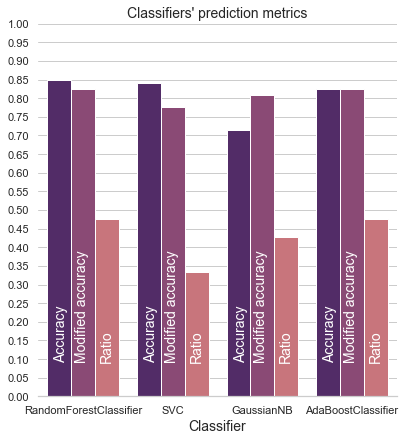

In [30]:
# classifier_accuracy - regular accuracy of the classifier on the validation set
# modified_accuracy - accuracy of the classifiers results after modifying the classifier's predictions by forcing every 
#                     race to have exactly one winner
# ratio - ratio of the predicted winner matching the actual winner

# Creating a custom palette for the plot
custom_palette = ["#552271" if (x == 'classifier_accuracy') 
                  else 
                  "#953f79" if (x == 'modified_accuracy')
                  else 
                  "#d66771" for x in df_classifier_accuracies['meaning']]

# Drawing a nested barplot
sns.set(style="whitegrid")
g = sns.catplot(x="classifiers", y="result", hue="meaning", data=df_classifier_accuracies,
                height=6, kind="bar", palette=custom_palette)
g.despine(left=True)
g.set_ylabels("")
g.set_xlabels("Classifier", fontsize=14)

g.set(ylim=(0, 1), yticks=[0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])
g._legend.remove()

plt.title("Classifiers' prediction metrics", fontsize = 14)
temp = ['Accuracy', 'Modified accuracy', 'Ratio']
plt.text(-0.32, 0.1, temp[0], rotation=90, color="white",fontsize=14)
plt.text(-0.09, 0.1, temp[1], rotation=90, color="white",fontsize=14)
plt.text(0.19, 0.1, temp[2], rotation=90, color="white",fontsize=14)
plt.text(0.68, 0.1, temp[0], rotation=90, color="white",fontsize=14)
plt.text(0.91, 0.1, temp[1], rotation=90, color="white",fontsize=14)
plt.text(1.19, 0.1, temp[2], rotation=90, color="white",fontsize=14)
plt.text(1.68, 0.1, temp[0], rotation=90, color="white",fontsize=14)
plt.text(1.91, 0.1, temp[1], rotation=90, color="white",fontsize=14)
plt.text(2.19, 0.1, temp[2], rotation=90, color="white",fontsize=14)
plt.text(2.68, 0.1, temp[0], rotation=90, color="white",fontsize=14)
plt.text(2.91, 0.1, temp[1], rotation=90, color="white",fontsize=14)
plt.text(3.19, 0.1, temp[2], rotation=90, color="white",fontsize=14)

plt.show()

#classifier_accuracies_and_ratios = g.fig
#classifier_accuracies_and_ratios.savefig('Graphs/classifier_accuracies_and_ratios.svg', bbox_inches = 'tight')

# [1] Modified accuracy is achieved by taking the predictions of the classifier and adjusting them as such
# that for every single race, exactly one driver is predicted as the winner. Only the one with the highest is
# left as the winner (whether there were 0 win predictions or more than 1).

# [2] Ratio is the ratio of the amount of winners predicted correctly divided by the amount of races.

Inspecting RandomForestClassifier feature importances.

In [31]:
# Getting the feature importances for the RandomForestClassifier 'rf'
rf_feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

print("Most important factures of RandomForestClassifier predicting:")
print(rf_feature_importances.head(30))
print()
print("Constructor with id 131 is: Mercedes.")
print("Driver with id 1 is:        Lewis Hamilton.")
print("Both were the most dominating in their categories during this era.")

Most important factures of RandomForestClassifier predicting:
                     importance
qualifying_position    0.121981
grid_position          0.104175
driver_id_1            0.099119
constructor_id_131     0.098506
Q3_time                0.080553
pit_stop_duration      0.075472
fastest_lap_time       0.073977
lap_of_fastest_lap     0.071751
round                  0.048515
year                   0.031077
pit_stops              0.030057
circuit_2              0.017270
constructor_id_9       0.013907
circuit_11             0.012200
constructor_id_6       0.009102
driver_id_817          0.008998
circuit_4              0.007534
circuit_7              0.007374
circuit_6              0.007116
driver_id_20           0.005738
constructor_id_3       0.005445
circuit_1              0.005379
driver_id_822          0.005374
circuit_9              0.005177
circuit_70             0.004953
circuit_13             0.004778
driver_id_8            0.004734
circuit_69             0.004497
circuit_22

Inspecting AdaBoostClassifier feature importances.

In [32]:
# Getting the feature importances for the AdaBoostClassifier 'ada'
ada_feature_importances = pd.DataFrame(ada.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

print("Most important factures of AdaBoostClassifier predicting:")
print(ada_feature_importances.head(30))

Most important factures of AdaBoostClassifier predicting:
                     importance
pit_stop_duration          0.25
Q3_time                    0.12
lap_of_fastest_lap         0.12
fastest_lap_time           0.10
round                      0.08
grid_position              0.05
qualifying_position        0.05
constructor_id_9           0.04
year                       0.03
driver_id_20               0.03
pit_stops                  0.02
driver_id_1                0.02
circuit_6                  0.02
constructor_id_5           0.01
circuit_22                 0.01
driver_id_830              0.01
constructor_id_3           0.01
circuit_71                 0.01
driver_id_8                0.01
circuit_11                 0.01
circuit_69                 0.00
circuit_14                 0.00
circuit_34                 0.00
circuit_32                 0.00
circuit_70                 0.00
circuit_24                 0.00
circuit_18                 0.00
circuit_17                 0.00
circuit_15    

Creating a proper DataFrame from feature importances of RFC.

In [33]:
df_rf_features = pd.DataFrame(columns = ['feature', 'importance'])
print(df_rf_features)
for index, row in rf_feature_importances.iterrows():
    feature_name = row.name
    importance_value = row.tolist()[0]
    df_rf_features.loc[-1] = [feature_name, importance_value]
    df_rf_features.index = df_rf_features.index + 1
    df_rf_features = df_rf_features.sort_index(ascending = False)

Empty DataFrame
Columns: [feature, importance]
Index: []


Creating a proper DataFrame from feature importances of AdaBoostClassifier.

In [34]:
df_ada_features = pd.DataFrame(columns = ['feature', 'importance'])
print(df_ada_features)
for index, row in ada_feature_importances.iterrows():
    feature_name = row.name
    importance_value = row.tolist()[0]
    df_ada_features.loc[-1] = [feature_name, importance_value]
    df_ada_features.index = df_ada_features.index + 1
    df_ada_features = df_ada_features.sort_index(ascending = False)

Empty DataFrame
Columns: [feature, importance]
Index: []


Plotting 10 most important features of RandomForestClassifier and AdaBoostClassifier.

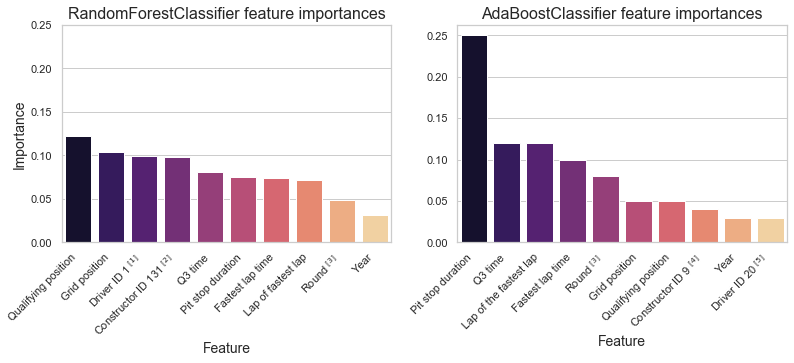

In [35]:
# Using the same-scale y-axis from 0 to 0.25.

fig, axes = plt.subplots(1, 2, figsize=(13, 4))
bplot_1 = sns.barplot(x = 'feature', y = 'importance', data = df_rf_features.head(10),
            palette = 'magma', ax=axes[0])
bplot_1.set_xticklabels(['Qualifying position', 'Grid position', 'Driver ID 1 $^{[1]}$', 'Constructor ID 131 $^{[2]}$',
                       'Q3 time', 'Pit stop duration', 'Fastest lap time', 'Lap of fastest lap', 'Round $^{[3]}$', 'Year']
                      , rotation=45, horizontalalignment='right')
bplot_1.set_title('RandomForestClassifier feature importances', fontsize=16)
bplot_1.set_xlabel("Feature", fontsize=14)
bplot_1.set_ylabel("Importance", fontsize=14)
bplot_1.set(ylim=(0,0.25))

bplot_2 = sns.barplot(x = 'feature', y = 'importance', data = df_ada_features.head(10),
            palette = 'magma', ax=axes[1])

bplot_2.set_xticklabels(['Pit stop duration', 'Q3 time', 'Lap of the fastest lap', 'Fastest lap time', 'Round $^{[3]}$', 
                      'Grid position', 'Qualifying position', 'Constructor ID 9 $^{[4]}$', 'Year', 'Driver ID 20 $^{[5]}$'],
                      rotation=45, horizontalalignment='right')
bplot_2.set_title('AdaBoostClassifier feature importances', fontsize=16)
bplot_2.set_xlabel("Feature", fontsize=14)
bplot_2.set_ylabel("")
bplot_1.set(ylim=(0,0.25))
plt.style.use('seaborn-whitegrid')
plt.show()

#randomforestclassifier_feature_importances = bplot_1.get_figure()
#randomforestclassifier_feature_importances.savefig('Graphs/randomforestclassifier_feature_importances.svg', bbox_inches = 'tight')


# [1] Driver ID 1 determines whether you are Lewis Hamilton or not
# [2] Constructor ID 131 determines whether you drive for the Mercedes team or not
# [3] Round shows which race of the season it was (for example the 4th race)
# [4] Constructor ID 9 determines whether you drive for the Red Bull team or not
# [5] Driver ID 20 determines whether you are Sebastian Vettel or not

Analysis of feature importances:
* Driving for the Mercedes team has a very high importance which could be considered to be problematic, because for the enjoyability and fairness of the sport, it's detrimental if one team outperforms others heavily. Simply being from the Mercedes team already increases your win chances (predictions) highly.
* It's interesting that many circuits have almost no effect on who wins. This should be considered as a positive thing, because this means that the circuits are fair for different teams (and drivers).
* It's interesting that being Lewis Hamilton has such a high effect on whether the driver is predicted as being a race winner. This is neither good or bad, but rather noteworthy how dominating his performances have been.

## Analysis of the 2012 season

Getting all the race results in the year 2012.

In [36]:
# Getting all of the id-s of the races in the year 2012
races_2012 = races[races['year'] == 2012]
race_ids_2012 = races_2012['race_id'].tolist()
# Getting all the race results based on found race id-s
results_2012 = results.loc[results['race_id'].isin(race_ids_2012)]
# Getting all the drivers of that season (id-s and names as list)
driver_ids_2012 = results_2012.driver_id.unique().tolist()
driver_names_2012 = []
forenames = drivers.loc[drivers['driver_id'].isin(driver_ids_2012)]['forename'].tolist()
surnames = drivers.loc[drivers['driver_id'].isin(driver_ids_2012)]['surname'].tolist()
temp_ids = drivers.loc[drivers['driver_id'].isin(driver_ids_2012)]['driver_id'].tolist()
driver_ids_2012 = temp_ids
for i in range(len(surnames)):
    driver_names_2012.append(forenames[i] + " " + surnames[i])
# Finding all the constructors of that year (id-s and names)
constructor_ids_2012 = results_2012.constructor_id.unique()
constructor_names_2012 = constructors.loc[constructors['constructor_id'].isin(constructor_ids_2012)]['name'].tolist()
# Filtering the driver_standings dataframe to contain only data of season 2012
driver_standings_2012 = driver_standings[driver_standings['race_id'].isin(race_ids_2012)]
# Filtering the constructor_standings dataframe to contain only data of season 2012
constructor_standings_2012 = constructor_standings[constructor_standings['race_id'].isin(race_ids_2012)]
# Filtering the constructor_results dataframe to contain only data of season 2012
constructor_results_2012 = constructor_results[constructor_results['race_id'].isin(race_ids_2012)]
# Filtering the qualifying dataframe to contain only data of season 2012
qualifying_2012 = qualifying[qualifying['race_id'].isin(race_ids_2012)]
# Filtering the lap_times dataframe to contain only data of season 2012
lap_times_2012 = lap_times[lap_times['race_id'].isin(race_ids_2012)]
# Filtering the pit_stops dataframe to contain only data of season 2012 
pit_stops_2012 = pit_stops[pit_stops['race_id'].isin(race_ids_2012)]

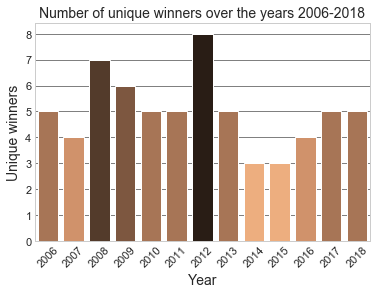

In [37]:
# Finding the number of unique winners of the season in 2006 to 2018
# (7 seasons before and 7 seasons after year 2012)
years_to_find_7 = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
nr_of_unique_winners = []
for year in years_to_find_7:
    races_that_year = races[races['year'] == year]
    race_ids_that_year = races_that_year['race_id'].tolist()
    winners_of_season = results[results['race_id'].isin(race_ids_that_year)]
    winners_of_season = winners_of_season[winners_of_season['position'] == '1']['driver_id'].tolist()
    nr_of_unique = np.array(winners_of_season)
    nr_of_unique = np.unique(nr_of_unique)
    nr_of_unique_winners.append(len(nr_of_unique))

dataframe = pd.DataFrame(columns = ['years', 'unique_winners'])
dataframe['years'] = years_to_find_7
dataframe['unique_winners'] = nr_of_unique_winners

# Hue of the palette depends on the amount of unique winners (the y-axis value)
bplot = sns.barplot(x = 'years', y = 'unique_winners', data = dataframe,
            palette = 'copper_r', hue = 'unique_winners', dodge=False)
bplot.legend_.remove()
bplot.set_xlabel("Year",fontsize=14)
bplot.set_ylabel("Unique winners",fontsize=14)
bplot.set_xticklabels(bplot.get_xticklabels(), rotation=45)
bplot.set_axisbelow(True)
bplot.yaxis.grid(color='gray')
plt.title('Number of unique winners over the years 2006-2018', fontsize=14)
plt.style.use('seaborn-whitegrid')
plt.show()

#number_of_unique_winners_2006_2018 = bplot.get_figure()
#number_of_unique_winners_2006_2018.savefig("Graphs/number_of_unique_winners_2006-2018.svg", bbox_inches = 'tight')
#plt.savefig('Graphs/number_of_unique_winners_2006-2018.svg')

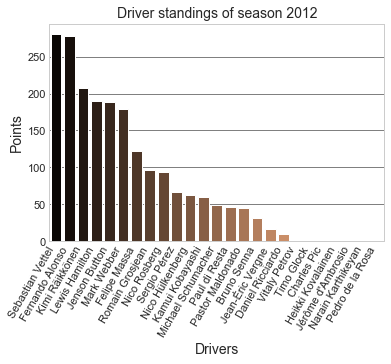

In [38]:
# THIS IS NOT ON THE POSTER (overlaps with the graph from the cell below)

# Finding the final results of the 2012 season 
last_race_of_2012 = race_ids_2012[len(race_ids_2012)-1]
driver_standings_2012_last = driver_standings[driver_standings['race_id'] == last_race_of_2012]
driver_standings_2012_last = driver_standings_2012_last[['driver_id','points','position']]
names = []
for i, row in driver_standings_2012_last.iterrows():
    index = driver_ids_2012.index(int(row['driver_id']))
    names.append(driver_names_2012[index]) 
driver_standings_2012_last['driver_name'] = names
driver_standings_2012_last = driver_standings_2012_last.sort_values(['position'], ascending=True)

bplot = sns.barplot(x = 'driver_name', y = 'points', data = driver_standings_2012_last,
            palette = 'copper')

#bplot.set(xlabel='Drivers', ylabel='Points')
bplot.set_xlabel("Drivers",fontsize=14)
bplot.set_ylabel("Points",fontsize=14)
bplot.set_xticklabels(bplot.get_xticklabels(), rotation=60, horizontalalignment='right')
bplot.set_axisbelow(True)
bplot.yaxis.grid(color='gray')
plt.title('Driver standings of season 2012', fontsize=14)
plt.show()

#final_driver_standings_2012 = bplot.get_figure()
#final_driver_standings_2012.savefig('Graphs/final_driver_standings_2012.svg', bbox_inches = 'tight')

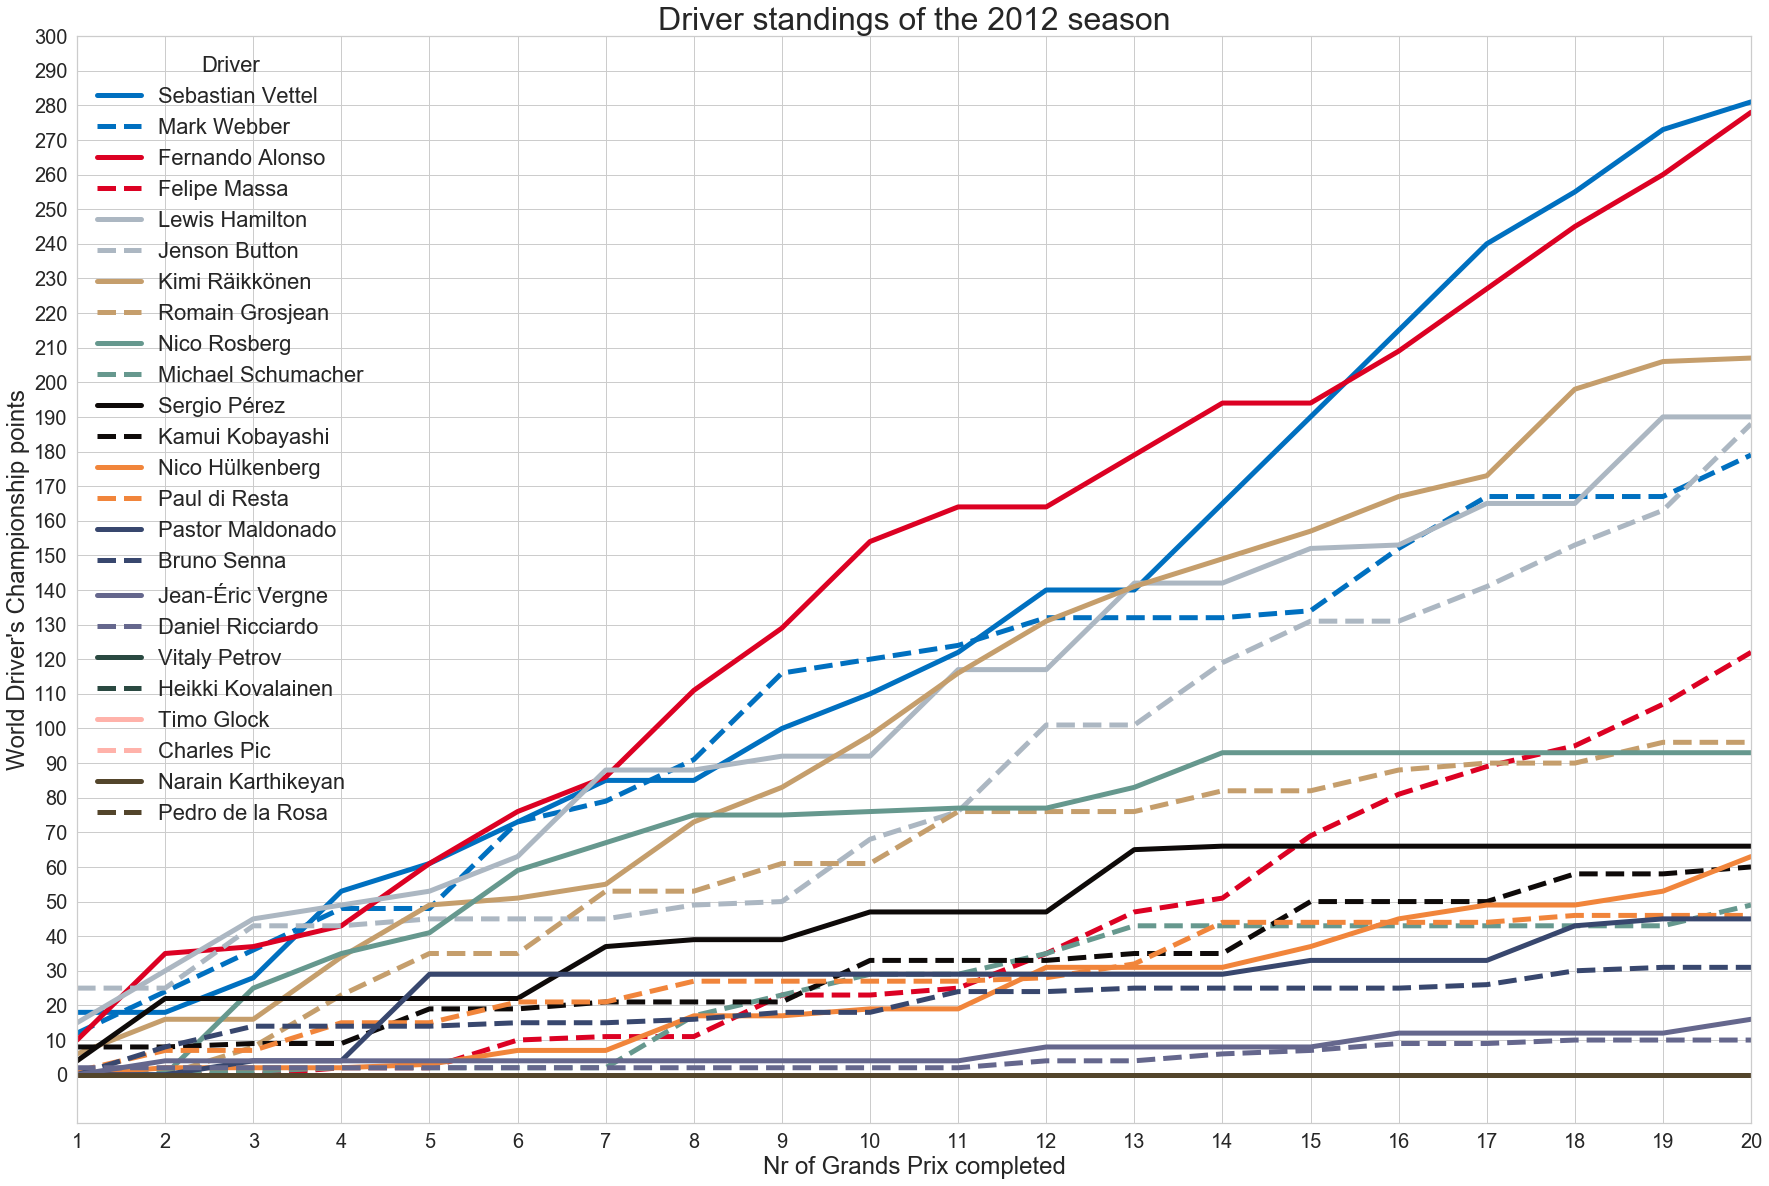

In [51]:
#
# NB! This cell has to be ran 2 times after opening the notebook or using 'Kernel -> Restart & Run All'
# Otherwise due to an unknown reason the colors and line styles are not correctly applied
#


# Graph of points per race
race_names_2012 = races_2012['name'].tolist()
driver_standings_per_race_2012 = pd.DataFrame(columns = driver_names_2012, index = race_names_2012)

# Team colors (in the order of the World Constructor's Championship)
# Red Bull #0070c0
# Ferrari #dc0123
# Mclaren #acb7c2
# Lotus #c59e6c
# Mercedes #66988e
# Sauber #0e0a09
# Force India #f1853b
# Williams #38476e
# Toro Rosso #65678d
# Caterham #2a4941
# Marussia #ffb2aa
# HRT #53452b

# Cycling through the regular and dashed line style
# Teammates are in groups of two and the better performing one is represented by a regular line, 
# the worse performing one is represented by a dashed line
# Cycling through team colors as well
linecycler = (cycler(linestyle=["-", "--", "-", "--", "-", "--", "-", "--", "-", "--", "-", "--",
                               "-", "--", "-", "--", "-", "--", "-", "--", "-", "--", "-", "--"]) + 
              cycler(color=['#0070c0', '#0070c0', '#dc0123', '#dc0123', '#acb7c2', '#acb7c2', '#c59e6c', '#c59e6c',
                           '#66988e', '#66988e', '#0e0a09', '#0e0a09', '#f1853b', '#f1853b', '#38476e', '#38476e',
                           '#65678d', '#65678d', '#2a4941', '#2a4941', '#ffb2aa', '#ffb2aa', '#53452b', '#53452b']))

# Adjusting the DataFrame - now holds drivers' full names, races' names, points
for idx, data in driver_standings_2012.iterrows():
    driver_forename = drivers.loc[drivers['driver_id'] == data['driver_id']]['forename'].item()
    driver_surname = drivers.loc[drivers['driver_id'] == data['driver_id']]['surname'].item()
    driver_name = driver_forename + " " + driver_surname
    current_race_name = races_2012.loc[races['race_id'] == data['race_id']]['name'].item()
    current_driver_points = data['points']
    driver_standings_per_race_2012.at[current_race_name, driver_name] = current_driver_points  

driver_standings_per_race_2012 = driver_standings_per_race_2012.set_index([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]])
driver_standings_per_race_2012 = driver_standings_per_race_2012.fillna(0)

# Driver pairs (of the same team) are in the order of the World Constructor's Championship
# Drivers of the same team are in the order of the World Driver's Championship
columns = ['Sebastian Vettel', 'Mark Webber', 'Fernando Alonso', 'Felipe Massa', 'Lewis Hamilton', 'Jenson Button',
           'Kimi Räikkönen', 'Romain Grosjean', 'Nico Rosberg', 'Michael Schumacher', 'Sergio Pérez', 'Kamui Kobayashi',
           'Nico Hülkenberg', 'Paul di Resta', 'Pastor Maldonado', 'Bruno Senna', 'Jean-Éric Vergne', 'Daniel Ricciardo',
           'Vitaly Petrov', 'Heikki Kovalainen', 'Timo Glock' , 'Charles Pic', 'Narain Karthikeyan', 'Pedro de la Rosa']

driver_standings_per_race_2012 = driver_standings_per_race_2012[columns]

ax = driver_standings_per_race_2012
a = ax.plot(linewidth=5, figsize = (30, 20))
plt.rc('axes', prop_cycle=linecycler)
a.tick_params(axis = 'both', which = 'major', labelsize = 20)
a.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.xticks(range(1,21))
plt.yticks(range(0, 310, 10))
plt.xlabel('Nr of Grands Prix completed', fontsize=24)  # Grands Prix is the plural of Grand Prix
plt.ylabel("World Driver's Championship points", fontsize=24)
plt.title("Driver standings of the 2012 season", fontsize=32)
a.legend(loc='upper left', fontsize=22,
         title='Driver', title_fontsize=22)

#plt.savefig('Graphs/points_graph_2012.svg')

In [40]:
# Finding when did the winner of a season win for the first time in that season (2006-2018)
years_to_find_winner = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
first_wins = []
second_wins = []
third_wins = []
for year in years_to_find_winner:
    races_that_year = races[races['year'] == year]
    race_ids_that_year = races_that_year['race_id'].tolist()
    last_race_of_the_year = race_ids_that_year[len(race_ids_that_year)-1]
    driver_standings_that_year_last = driver_standings[driver_standings['race_id'] == last_race_of_the_year]
    winner = driver_standings_that_year_last[driver_standings_that_year_last['position_text']=='1']['driver_id'].item()
    
    first_win = 0
    for i in range(len(race_ids_that_year)):
        results_that_race = results[results['race_id'] == race_ids_that_year[i]]
        winner_of_that_race = results_that_race[results_that_race['position_text'] == '1']['driver_id'].item()
        if(winner_of_that_race == winner):
            first_win = i+1
            break
    first_wins.append(first_win)
    
    second_win = 0
    temp = 0
    for i in range(len(race_ids_that_year)):
        results_that_race = results[results['race_id'] == race_ids_that_year[i]]
        winner_of_that_race = results_that_race[results_that_race['position_text'] == '1']['driver_id'].item()
        if(winner_of_that_race == winner):
            second_win = i+1
            temp += 1
            if(temp==2):
                break
    second_wins.append(second_win)
    
    third_win = 0
    temp = 0
    for i in range(len(race_ids_that_year)):
        results_that_race = results[results['race_id'] == race_ids_that_year[i]]
        winner_of_that_race = results_that_race[results_that_race['position_text'] == '1']['driver_id'].item()
        if(winner_of_that_race == winner):
            third_win = i+1
            temp += 1
            if(temp==3):
                break
    third_wins.append(third_win)
    
years = years_to_find_winner +  years_to_find_winner + years_to_find_winner
wins = first_wins + second_wins +third_wins
f_s_t = ['First win', 'First win', 'First win', 'First win', 'First win', 'First win', 'First win', 'First win',
         'First win', 'First win', 'First win', 'First win', 'First win', 'Second win', 'Second win', 'Second win',
         'Second win', 'Second win', 'Second win', 'Second win', 'Second win', 'Second win', 'Second win', 'Second win',
         'Second win', 'Second win', 'Third win', 'Third win', 'Third win', 'Third win', 'Third win', 'Third win',
         'Third win', 'Third win', 'Third win', 'Third win', 'Third win', 'Third win', 'Third win']

df_years_wins = pd.DataFrame(
    {'year': years,
     'win': wins,
     'Legend': f_s_t
    })

Plotting the first/second/third win of the season winner in 2006-2018.

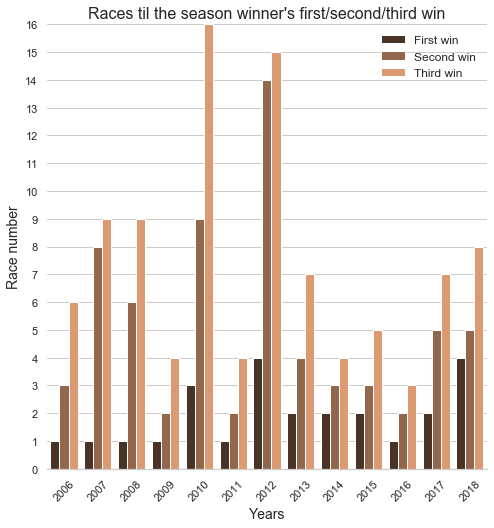

In [41]:
# Draw a nested barplot
sns.set(style="whitegrid")
g = sns.catplot(x="year", y="win", hue="Legend", data=df_years_wins,
                height=7, kind="bar", palette='copper')
g.despine(left=True)
g.set_ylabels("Race number", fontsize=14)
g.set_xlabels("Years", fontsize=14)

g.set_xticklabels(rotation=45)
g.set(ylim=(0, 16), yticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
g._legend.remove()
plt.legend(loc='upper right', prop={'size': 12})

plt.title("Races til the season winner's first/second/third win", fontsize=16)

plt.show()

#races_til_seasons_winners_nth_win = g.fig
#races_til_seasons_winners_nth_win.savefig('Graphs/races_til_seasons_winners_nth_win.svg', bbox_inches = 'tight')

## Comparing Michael Schumacher and Lewis Hamilton

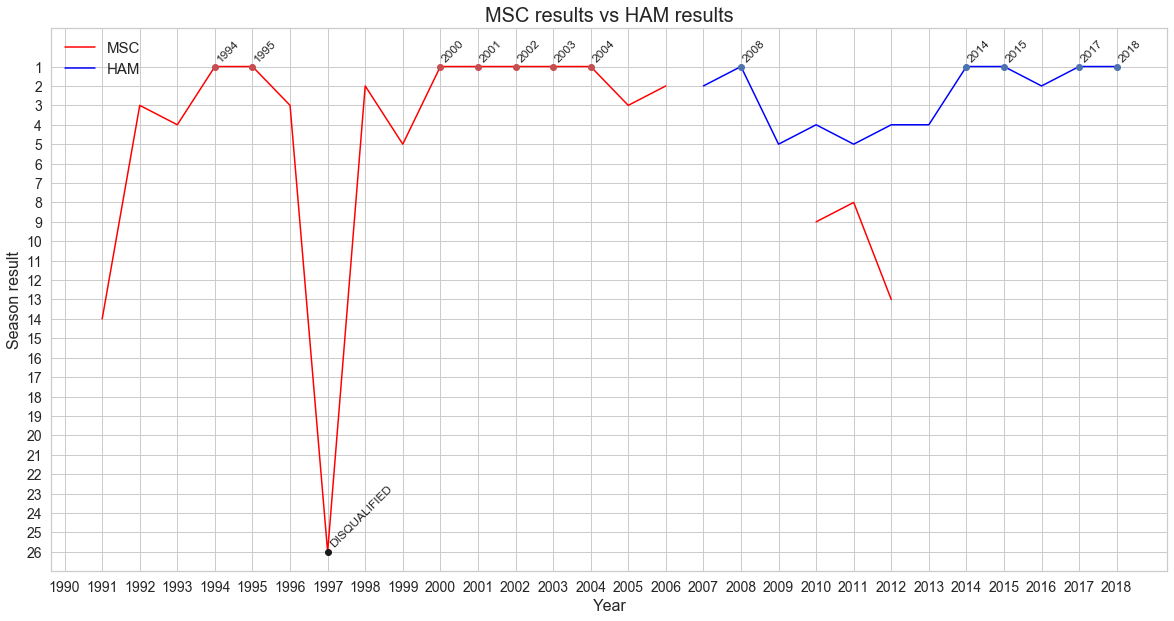

In [42]:
MSC_id = drivers.loc[(drivers['forename'] == 'Michael') & (drivers['surname'] == 'Schumacher')]['driver_id'].item()
HAM_id = drivers.loc[(drivers['forename'] == 'Lewis') & (drivers['surname'] == 'Hamilton')]['driver_id'].item()

MSC_results = results.loc[results['driver_id'] == MSC_id]
MSC_years = []

HAM_results = results.loc[results['driver_id'] == HAM_id]
HAM_years = []

for idnr in MSC_results['race_id']:
    year = races.loc[races['race_id'] == idnr]['year'].item()
    if (year not in MSC_years):
        MSC_years.append(year)
        
for idnr in HAM_results['race_id']:
    year = races.loc[races['race_id'] == idnr]['year'].item()
    if (year not in HAM_years):
        HAM_years.append(year)
        
MSC_years.sort()
HAM_years.sort()

# Need to remove current year, as there are no results added to dataset.
HAM_years.remove(2019)

MSC_results = []
HAM_results = []

for year in MSC_years:
    last_race_of_that_year = races[races['year'] == year].iloc[-1]
    results_that_year = driver_standings.loc[driver_standings['race_id'] == last_race_of_that_year['race_id'].item()]
    MSC_results.append(results_that_year.loc[results_that_year['driver_id'] == MSC_id]['position'].item())
    
for year in HAM_years:
    last_race_of_that_year = races[races['year'] == year].iloc[-1]
    results_that_year = driver_standings.loc[driver_standings['race_id'] == last_race_of_that_year['race_id'].item()]
    HAM_results.append(results_that_year.loc[results_that_year['driver_id'] == HAM_id]['position'].item())

all_years = list(set(MSC_years + HAM_years))

for i in range(3):
    MSC_results.insert(len(MSC_years) - 3, np.nan)
    
for i in range(6):
    MSC_results.append(np.nan)
for i in range(len(all_years) - len(HAM_years)):
    HAM_results.insert(0, np.nan)
    
MSC_df = pd.DataFrame({'year':all_years, 'MSC':MSC_results})
HAM_df = pd.DataFrame({'year':all_years, 'HAM':HAM_results})

plt.figure(figsize=(20, 10))

plt.title("MSC results vs HAM results", fontsize=20)
plt.plot('year', 'MSC', data=MSC_df, color='red')
plt.plot('year', 'HAM', data=HAM_df, color='blue')
plt.xlabel("Year", fontsize=16)
plt.ylabel("Season result", fontsize=16)
plt.gca().invert_yaxis()
plt.legend(loc=2, prop={'size': 15})
plt.xticks(range(1990, 2019, 1), fontsize=14)
plt.yticks(range(26, 0, -1), fontsize=14)
plt.grid()

plt.ylim(top= -1)
plt.ylim(bottom=27)

for i in range(len(MSC_results)):
    if (MSC_results[i] == 1):
        plt.plot(MSC_years[i], 1, 'ro')
        plt.text(MSC_years[i], 1 - 0.25, MSC_years[i], rotation = 45)
    if (MSC_results[i] == 26):
        plt.plot(MSC_years[i], 26, 'ko')
        plt.text(MSC_years[i], 26 - 0.25, "DISQUALIFIED", rotation = 45)
        
for i in range(len(HAM_results[16:])):
    if (HAM_results[i+16] == 1):
        plt.plot(HAM_years[i], 1, 'bo')
        plt.text(HAM_years[i], 1 - 0.25, HAM_years[i], rotation = 45)
        
plt.grid()

#plt.savefig('Graphs/msc_results_vs_ham_results.svg')

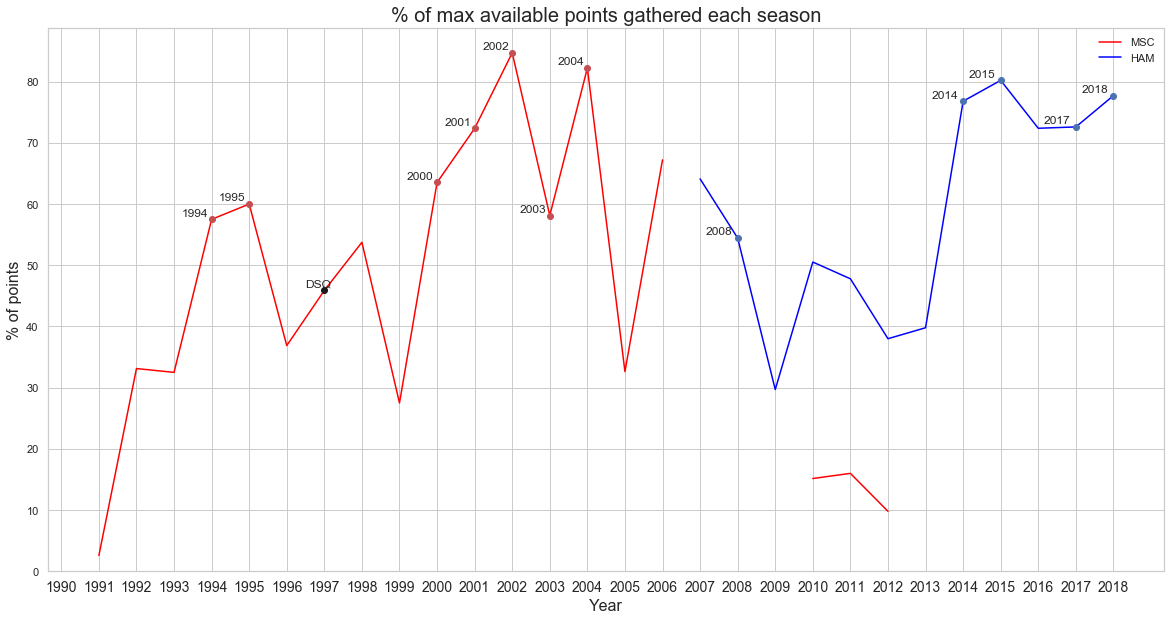

In [43]:
# (MAYBE) Find % of MAX available points gathered in every season
# (if 1st place got 25pts and there were 20 races, then max available pts = 25*20 = 500)
# In 2019 season, 1 point was awarded for fastest lap, but since dataset in use only has results up to 2018 season, it
# won't be accounted for.

# There is need to view every year separately, as there have been cases, where not maximum amount of points have been awarded
# for the winner (such as 2009 Malaysian Grand Prix), meaning can't give default values for max points for each year.

def max_available_pts_in_seasons(driver_forename, driver_surname):
    driver_id = drivers.loc[(drivers['forename'] == driver_forename) & 
                                     (drivers['surname'] == driver_surname)]['driver_id'].item()
    
    driver_results = results.loc[results['driver_id'] == driver_id]
    driver_years = []
    
    for idnr in driver_results['race_id']:
        year = races.loc[races['race_id'] == idnr]['year'].item()
        if (year not in driver_years):
            driver_years.append(year)
            
    driver_years.sort()
    
    # Need to remove year 2019, as some values seem to be missing.
    if (2019 in driver_years):
        driver_years.remove(2019)
    
    year_and_driver_pts = pd.DataFrame({'year':driver_years,
                                    'total_points':[0 for x in range(len(driver_years))], 
                                    'driver_points':[0 for x in range(len(driver_years))]})
    
    # Getting only 1st places for each race.
    top_points = results.set_index(['position_order'])
    top_points = top_points.loc[1]

    for idx, row in top_points.iterrows():
        currently_viewed_raceid = row['race_id']
        currently_viewed_year = races[races['race_id'] == currently_viewed_raceid]['year'].item()
        currently_viewed_pts = row['points']

        year_and_driver_pts.loc[year_and_driver_pts['year'] == currently_viewed_year, 'total_points'] += currently_viewed_pts
        #print(currently_viewed_year)
        #print(row)
        
    driver_points = []
        
    for year in driver_years:
        last_race_of_that_year = races[races['year'] == year].iloc[-1]
        results_that_year = driver_standings.loc[driver_standings['race_id'] == last_race_of_that_year['race_id'].item()]
        driver_points.append(results_that_year[results_that_year['driver_id'] == driver_id]['points'].item())

    for i in range(len(driver_points)):
        year_and_driver_pts.iloc[i, 2] = driver_points[i]
        
    result = []
    
    year_and_driver_pts = year_and_driver_pts.sort_values(by = ['year'])

    for idx, row in year_and_driver_pts.iterrows():
        result.append(round(row['driver_points'] / row['total_points'] * 100, 5))
        
    return (driver_years, result)
    
MSC_years, MSC_points = max_available_pts_in_seasons('Michael', 'Schumacher')
HAM_years, HAM_points = max_available_pts_in_seasons('Lewis', 'Hamilton')

all_years = list(set(MSC_years + HAM_years))

for i in range(3):
    MSC_points.insert(len(MSC_years) - 3, np.nan)
    
for i in range(6):
    MSC_points.append(np.nan)
for i in range(len(all_years) - len(HAM_years)):
    HAM_points.insert(0, np.nan)


plt.figure(figsize=(20,10))
plt.title("% of max available points gathered each season", fontsize = 20)
plt.plot(all_years, MSC_points, color = "red", label = "MSC")
plt.plot(all_years, HAM_points, color = "blue", label = "HAM")
plt.xticks(range(1990, 2019, 1), fontsize=14)
plt.xlabel("Year", fontsize=16)
plt.ylabel("% of points", fontsize=16)
plt.ylim(bottom=0)
plt.legend()

for i in range(len(MSC_results)):
    if (MSC_results[i] == 1):
        plt.plot(MSC_years[i], MSC_points[i], 'ro')
        plt.text(MSC_years[i] - 0.8, MSC_points[i] + 0.5, MSC_years[i])
    if (MSC_results[i] == 26):
        plt.plot(MSC_years[i], MSC_points[i], 'ko')
        plt.text(MSC_years[i] - 0.5, MSC_points[i] + 0.5, "DSQ")
        
for i in range(len(HAM_results[16:])):
    if (HAM_results[i+16] == 1):
        plt.plot(HAM_years[i], HAM_points[i+16], 'bo')
        plt.text(HAM_years[i] - 0.85, HAM_points[i+16] + 0.5, HAM_years[i])
        
#plt.savefig('Graphs/max_available_pts_per_season.svg')

In [44]:
# If driver won, on average how big was the margin with 2nd place

def winning_margin_for_driver(driver_forename, driver_surname):
    driver_id = drivers.loc[(drivers['forename'] == driver_forename) & 
                                     (drivers['surname'] == driver_surname)]['driver_id'].item()
    
    race_results_for_driver = results[results['driver_id'] == driver_id]
    driver_wins = race_results_for_driver[race_results_for_driver['position'] == '1']
    driver_wins_ids = driver_wins[['race_id', 'milliseconds']]
    driver_wins_ids = driver_wins_ids.reindex(columns = ['race_id', 'milliseconds', 'milliseconds_2nd'])
    for raceid in driver_wins_ids['race_id']:
        second_place_ms = results[(results['race_id'] == raceid) & (results['position'] == '2')]['milliseconds'].item()
        driver_wins_ids.loc[driver_wins_ids['race_id'] == raceid, 'milliseconds_2nd'] = second_place_ms
        
    winning_margin_total = 0
    number_of_rows = 0
    
    # NOTE: Because there can be situations, where there is no time for 2nd place, there is need for try - catch block. 
    # For example: For race with id 257 (1994 Brazilian Grand Prix) there is no finishing time for 2nd place, 
    # as Michael Schumacher managed to lap every other car to cross the finish line. 

    for idx, row in driver_wins_ids.iterrows():
        try:
            winning_margin_total += (int(row['milliseconds_2nd']) - int(row['milliseconds']))
            number_of_rows += 1
        except:
            pass
        
    winning_margin_avg_seconds = (winning_margin_total / number_of_rows) / 1000
        
    return winning_margin_avg_seconds

print('Average winning margin for MSC: ' + str(winning_margin_for_driver('Michael', 'Schumacher')) + 's')
print('Average winning margin for HAM: ' + str(winning_margin_for_driver('Lewis', 'Hamilton')) + 's')

Average winning margin for MSC: 14.4402s
Average winning margin for HAM: 8.02466265060241s


In [45]:
# Win % of all races which driver participated in

def win_percentage_for_driver(driver_forename, driver_surname):
    driver_id = drivers.loc[(drivers['forename'] == driver_forename) & 
                                     (drivers['surname'] == driver_surname)]['driver_id'].item()
    
    race_results_for_driver = results[results['driver_id'] == driver_id]
    number_of_races_for_driver = len(race_results_for_driver.index)
    driver_wins = race_results_for_driver[race_results_for_driver['position'] == '1']
    number_of_wins_for_driver = len(driver_wins.index)
    return (number_of_wins_for_driver / number_of_races_for_driver) * 100

print("Win percentage for Michael Schumacher over his career: " + str(win_percentage_for_driver('Michael', 'Schumacher')))
print("Win percentage for Lewis Hamilton over his career: " + str(win_percentage_for_driver('Lewis', 'Hamilton')))
    

# (MAYBE) Also find win % separately for each season for both drivers

Win percentage for Michael Schumacher over his career: 29.545454545454547
Win percentage for Lewis Hamilton over his career: 33.33333333333333


In [46]:
# As found out below, qualifying results cannot really be used, as many results are unfortunately missing from dataset.

# Qualifying results - 
# - How many Q3 appearances out of all qualification sessions driver took part in.
def q3_appearances_for_driver(driver_forename, driver_surname):
    driver_id = drivers.loc[(drivers['forename'] == driver_forename) & 
                                     (drivers['surname'] == driver_surname)]['driver_id'].item()
    
    #qualification_results_for_driver = qualifying[qualifying['driver_id'] == driver_id]
    
    # While using grid positions is not ideal, as there could be penalties that were applied after qualifying, they
    # give a better overview than incomplete qualifying results.
    
    race_results_for_driver = results[results['driver_id'] == driver_id]
    
    all_appearances = len(race_results_for_driver.index)
    q3_appearances = 0
    
    for idx, row in race_results_for_driver.iterrows():
        if (int(row['grid']) <= 10):
            q3_appearances += 1
    
    return (q3_appearances / all_appearances) * 100
    
print('% of times Michael Schumacher has appeared in 3rd qualifying session: ' + 
      str(q3_appearances_for_driver('Michael', 'Schumacher')))

print('% of times Lewis Hamilton has appeared in 3rd qualifying session: ' + 
      str(q3_appearances_for_driver('Lewis', 'Hamilton')))

# - How many front row appearances out of all qualification sessions driver took part in.

def driver_front_rows(driver_forename, driver_surname):
    driver_id = drivers.loc[(drivers['forename'] == driver_forename) & 
                                     (drivers['surname'] == driver_surname)]['driver_id'].item()
    
    #qualification_results_for_driver = qualifying[qualifying['driver_id'] == driver_id]
    
    # Again, using grid results instead of qualifying results.
    race_results_for_driver = results[results['driver_id'] == driver_id]
    
    front_rows_for_driver = 0
    
    for idx, row in race_results_for_driver.iterrows():
        if (row['grid'] <= 2):
            front_rows_for_driver += 1
    
    #for idx, row in qualification_results_for_driver.iterrows():
    #    if (row['position'] <= 2):
    #        front_rows_for_driver += 1
            
    return front_rows_for_driver

print()

print("Number of times Michael Schumacher has qualified on the front row: " + str(driver_front_rows('Michael', 'Schumacher')))
print("Number of times Lewis Hamilton has qualified on the front row: " + str(driver_front_rows('Lewis', 'Hamilton')))

# - How many pole positions over drivers career

def driver_pole_positions(driver_forename, driver_surname):
    driver_id = drivers.loc[(drivers['forename'] == driver_forename) & 
                                     (drivers['surname'] == driver_surname)]['driver_id'].item()
    
    
    # And again, using grid results instead of qualifying results.
    race_results_for_driver = results[results['driver_id'] == driver_id]
    pole_positions = race_results_for_driver[race_results_for_driver['grid'] == 1]
    
    #qualification_results_for_driver = qualifying[qualifying['driver_id'] == driver_id]
    
    #pole_positions_for_driver = 0
    
    #for idx, row in qualification_results_for_driver.iterrows():
        #print(races[races['race_id'] == row['race_id']])
        #print(row)
        #print(row['position'])
    #    if (row['position'] == 1):
    #        pole_positions_for_driver += 1
            
    return len(pole_positions.index)

print()

print("Number of times Michael Schumacher has taken pole position: " + 
      str(driver_pole_positions('Michael', 'Schumacher')))

print("Number of times Lewis Hamilton has taken pole position: " + 
      str(driver_pole_positions('Lewis', 'Hamilton')))

#print(len(qualifying[qualifying['driver_id'] == 30].sort_values(by = ['position']).index))
#qualifying.head()


% of times Michael Schumacher has appeared in 3rd qualifying session: 89.28571428571429
% of times Lewis Hamilton has appeared in 3rd qualifying session: 91.56626506024097

Number of times Michael Schumacher has qualified on the front row: 116
Number of times Lewis Hamilton has qualified on the front row: 144

Number of times Michael Schumacher has taken pole position: 68
Number of times Lewis Hamilton has taken pole position: 87


In [47]:
# How many hat-tricks for both drivers - Pole position, race win and fastest lap.
# Cannot be done on dataset used, as there are no fastest laps beyond 2004 season.

def hat_tricks(driver_forename, driver_surname):
    driver_id = drivers.loc[(drivers['forename'] == driver_forename) & 
                                     (drivers['surname'] == driver_surname)]['driver_id'].item()
    
    race_results_for_driver = results[results['driver_id'] == driver_id]
    pole_positions = race_results_for_driver[race_results_for_driver['grid'] == 1]
    first_place_pole_position = pole_positions[pole_positions['position'] == '1']
    hat_tricks = first_place_pole_position[first_place_pole_position['rank'] == '1']
    
    return len(hat_tricks.index)
    
#hat_tricks("Michael", "Schumacher")

In [48]:
# Finds all seasons for which qualifying results are available.
# Takes long time to run, so I commented it out.

#races_copy = races.copy(deep = True)
#races_copy = races_copy.reindex(columns = ['race_id', 'year', 'name', 'date', 'quali'])

#for idx, row in qualifying.iterrows():
#    index = row['race_id']
#    races_copy.loc[races_copy['race_id'] == index, 'quali'] = 'yes'
#races_copy

## Finding correlation between grid position and finishing position

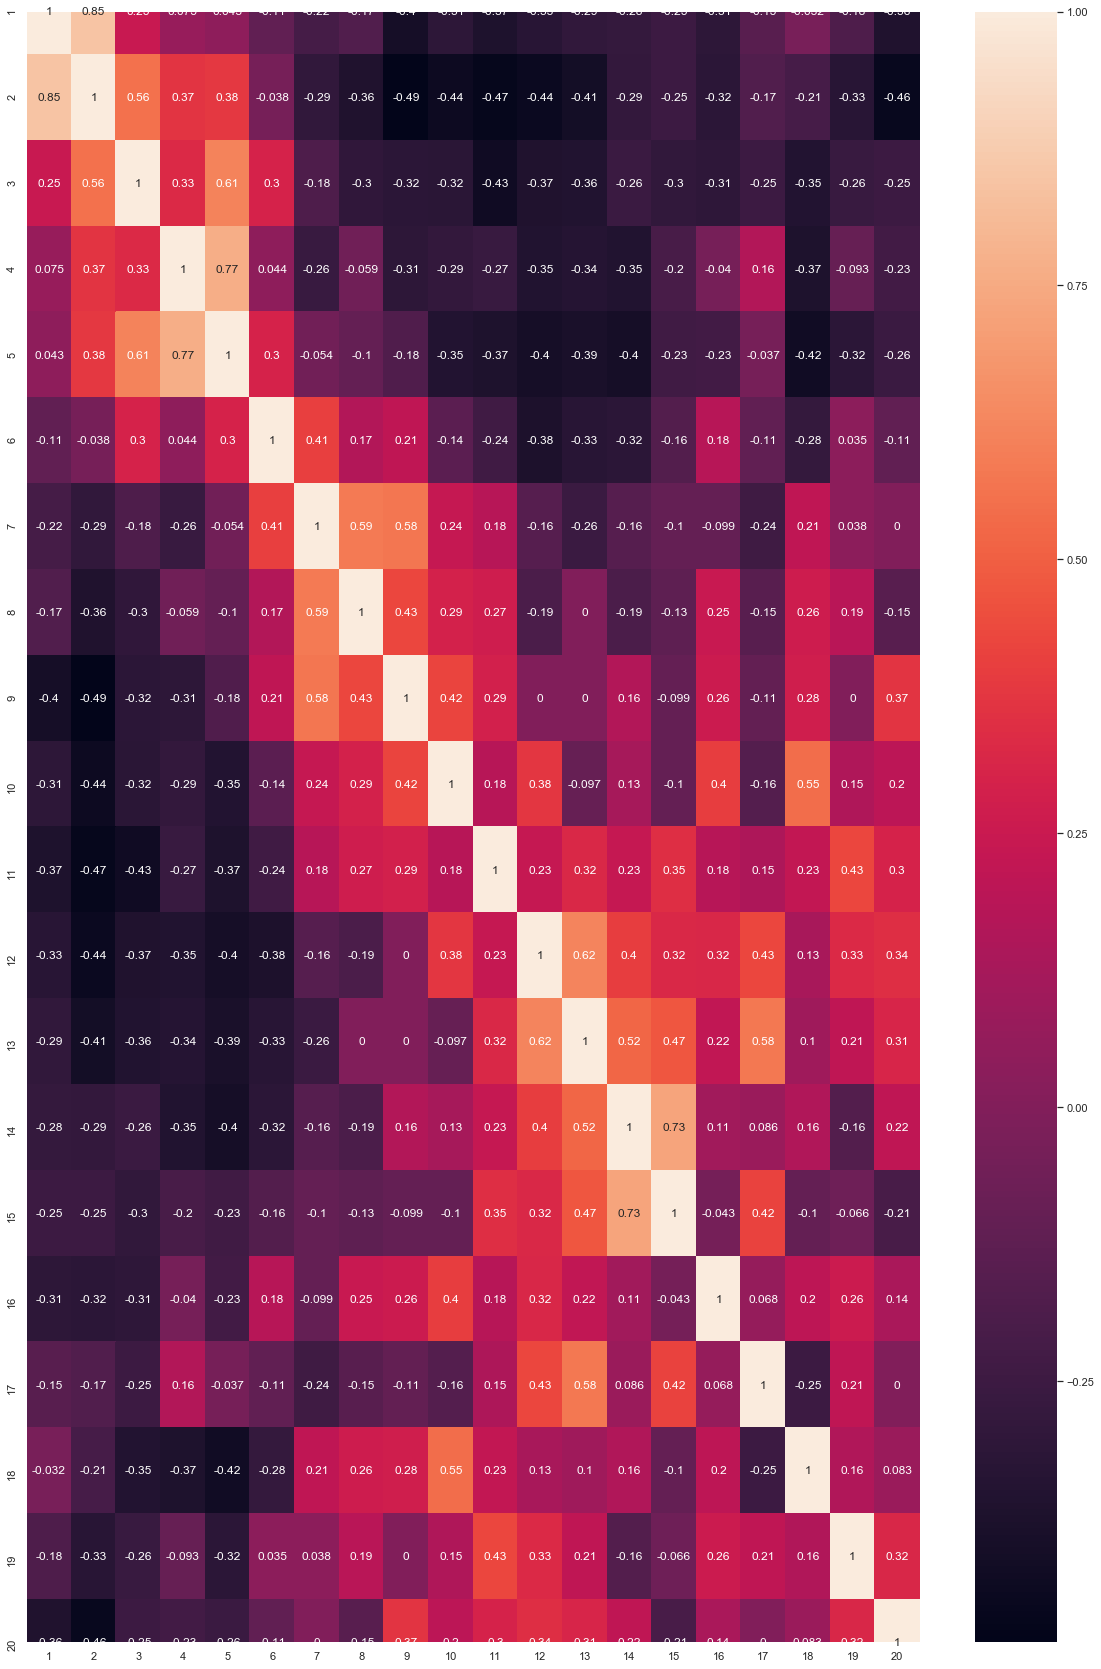

In [49]:
#results.tail(30)
#print(races[races['year'] == 2019])
# Example for 2018 season
# Not quite sure if this is even correct, but shows pretty well that when starting from the back of the grid, some gains can
# be made during race

indexes = races[races['year'] == 2018]['race_id'].to_list()
test_df = pd.DataFrame({'1':[0 for x in range(21)],
                       '2':[0 for x in range(21)],
                       '3':[0 for x in range(21)],
                       '4':[0 for x in range(21)],
                       '5':[0 for x in range(21)],
                       '6':[0 for x in range(21)],
                       '7':[0 for x in range(21)],
                       '8':[0 for x in range(21)],
                       '9':[0 for x in range(21)],
                       '10':[0 for x in range(21)],
                       '11':[0 for x in range(21)],
                       '12':[0 for x in range(21)],
                       '13':[0 for x in range(21)],
                       '14':[0 for x in range(21)],
                       '15':[0 for x in range(21)],
                       '16':[0 for x in range(21)],
                       '17':[0 for x in range(21)],
                       '18':[0 for x in range(21)],
                       '19':[0 for x in range(21)],
                       '20':[0 for x in range(21)]})

#test_df

#starting_position, end_position
#test_df.at[0, '1'] = 2

#test_df
#results_2012 = results.loc[results['race_id'].isin(race_ids_2012)]
results_2018 = results.loc[results['race_id'].isin(indexes)]

#results_2018

#print(races[races['race_id'] == 998])

for idx, row in results_2018.iterrows():

    start_position = row['grid']
    end_position = row['position_order']
    
    #print(start_position)
    #print(end_position)
    
    test_df.at[start_position, str(end_position)] += 1
    #print(row)
    
test_df
#results.tail()
#print(indexes)

#first_places_asd = pd.DataFrame({'1st':[50, 25], '2nd':[25, 15], '3rd':[15, 8], '4th':[6, 3]})
corrs = test_df.corr()
fig, ax = plt.subplots(figsize=(20, 30))
sns.heatmap(corrs, annot=True)
#corrs

#plt.savefig('Graphs/corrs_heatmap.svg')